# Bird Strikes Data Analysis 

### Introduction to the project

A bird Strike can be defined as a collision between a bird species and the aircraft engine . A bird strike can result in various mishaps such as crash landing of aircraft or an aircraft getting stalled which may lead to some unavoidable circumstantial landing situations. In order to prevent such mishaps from happening in the near future we propose an idea of predicting future bird strikes and analysis of the previous years data of bird strikes. The data of the previous years will be analysed and will help in improving the accuracy of prediction of bird strikes that might occur over the period of next five years. The prediction and analysis would be based on the parameters such as phase of flight, period of the day or altitude. Numerous other parameters like bird species and size of bird species can also be analysed through which there can be a pattern established which will not only help us understand the birds’ migration route but also help prevent any bird strikes in future. The prevention of bird strikes through prior prediction can save a lot of lives that might be at stake. The algorithms that can be used for prediction would be linear regression, random forest algorithm and time series analysis.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
# Specify the correct file name
file_name = 'Bird Strikes data.xlsx - Bird Strikes.csv'

# Read the CSV file into a DataFrame
bird_strikes_df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
bird_strikes_df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


# Data Cleaning

In [4]:
bird_strikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25429 non-null  object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [5]:
# Display the number of missing values per column
print(bird_strikes_df.isnull().sum())

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

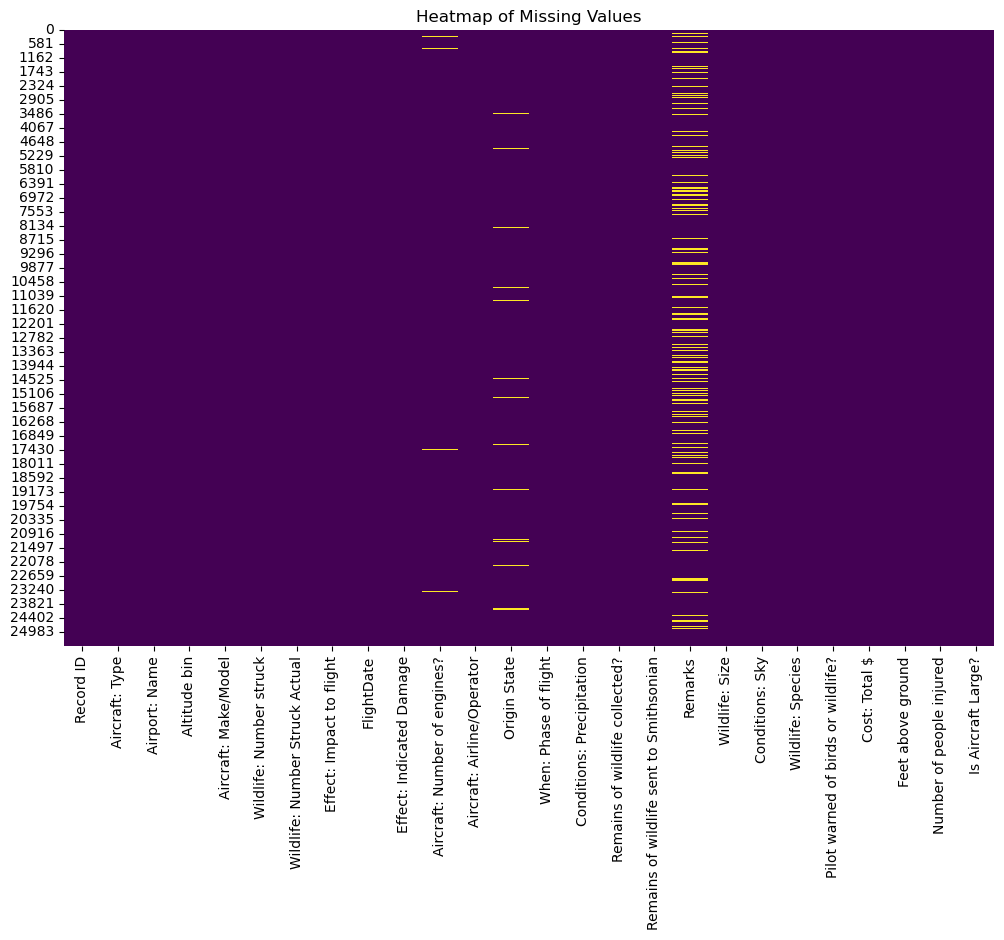

In [6]:
# Plot heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(bird_strikes_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [7]:
# Fill missing values in 'Aircraft: Type' with the mode
mode_aircraft_type = bird_strikes_df['Aircraft: Type'].mode()[0]
bird_strikes_df['Aircraft: Type'] = bird_strikes_df['Aircraft: Type'].fillna(mode_aircraft_type)

In [8]:
# Fill missing values in 'Airport: Name' with 'Unknown'
bird_strikes_df['Airport: Name'] = bird_strikes_df['Airport: Name'].fillna('Unknown')

In [9]:
# Fill missing values in 'Altitude bin' with the mode
mode_altitude_bin = bird_strikes_df['Altitude bin'].mode()[0]
bird_strikes_df['Altitude bin'] = bird_strikes_df['Altitude bin'].fillna(mode_altitude_bin)

In [10]:
mode_wildlife_number_struck = bird_strikes_df['Wildlife: Number struck'].mode()[0]
bird_strikes_df['Wildlife: Number struck'] = bird_strikes_df['Wildlife: Number struck'].fillna(mode_wildlife_number_struck)

In [11]:
# Fill missing values in 'Effect: Impact to flight' with the mode
mode_effect_impact = bird_strikes_df['Effect: Impact to flight'].mode()[0]
bird_strikes_df['Effect: Impact to flight'] = bird_strikes_df['Effect: Impact to flight'].fillna(mode_effect_impact)

# Fill missing values in 'FlightDate' with 'Unknown'
bird_strikes_df['FlightDate'] = bird_strikes_df['FlightDate'].fillna('Unknown')

In [12]:
# Fill missing values in 'Aircraft: Number of engines?' with the mode
mode_number_of_engines = bird_strikes_df['Aircraft: Number of engines?'].mode()[0]
bird_strikes_df['Aircraft: Number of engines?'] = bird_strikes_df['Aircraft: Number of engines?'].fillna(mode_number_of_engines)

# Fill missing values in 'Aircraft: Airline/Operator' with 'Unknown'
bird_strikes_df['Aircraft: Airline/Operator'] = bird_strikes_df['Aircraft: Airline/Operator'].fillna('Unknown')

# Fill missing values in 'Origin State' with 'Unknown'
bird_strikes_df['Origin State'] = bird_strikes_df['Origin State'].fillna('Unknown')

# Fill missing values in 'When: Phase of flight' with the mode
mode_phase_of_flight = bird_strikes_df['When: Phase of flight'].mode()[0]
bird_strikes_df['When: Phase of flight'] = bird_strikes_df['When: Phase of flight'].fillna(mode_phase_of_flight)

In [13]:
# Fill missing values in 'Remarks' with 'No remarks'
bird_strikes_df['Remarks'] = bird_strikes_df['Remarks'].fillna('No remarks')

In [14]:
# Fill missing values in the specified columns with the mode
columns_with_mode = [
    'Wildlife: Size',
    'Pilot warned of birds or wildlife?',
    'Feet above ground',
    'Is Aircraft Large?'
]

for column in columns_with_mode:
    mode_value = bird_strikes_df[column].mode()[0]
    bird_strikes_df[column] = bird_strikes_df[column].fillna(mode_value)

In [15]:
bird_strikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25558 non-null  object
 2   Airport: Name                            25558 non-null  object
 3   Altitude bin                             25558 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25558 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25558 non-null  object
 8   FlightDate                               25558 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25558 non-null  o

## Changing Data Types of Columns


In [16]:
# First, inspect the unique values to identify non-numeric entries
print(bird_strikes_df['Aircraft: Number of engines?'].unique())

['2' '3' '4' '1' 'C']


In [17]:
# Identify the mode of the column excluding 'C'
mode_number_of_engines = bird_strikes_df[bird_strikes_df['Aircraft: Number of engines?'] != 'C']['Aircraft: Number of engines?'].mode()[0]

# Replace 'C' with the mode
bird_strikes_df['Aircraft: Number of engines?'] = bird_strikes_df['Aircraft: Number of engines?'].replace('C', mode_number_of_engines)

# Convert the column to int64
bird_strikes_df['Aircraft: Number of engines?'] = bird_strikes_df['Aircraft: Number of engines?'].astype('int64')

# Verify the changes
print(bird_strikes_df['Aircraft: Number of engines?'].dtype)
print(bird_strikes_df['Aircraft: Number of engines?'].head())

int64
0    2
1    2
2    2
3    2
4    2
Name: Aircraft: Number of engines?, dtype: int64


In [18]:
# Check the unique values in the 'Cost: Total $' column
unique_cost_values = bird_strikes_df['Cost: Total $'].unique()

# Display the unique values
print(unique_cost_values)

['30,736' '0' '1,481,711' '1,483,141' '8,600' '35,146' '1,336' '10,691'
 '1,069' '801,820' '211,146' '40,091' '334' '56,127' '7,879' '458,207'
 '1,431,761' '12,397,751' '651' '1' '1,302' '976' '162,481' '3,644,483'
 '19,524' '4,165' '130' '262,923' '45,556' '65,080' '1,366,681' '31,239'
 '169,877' '570,483' '828,806' '253,548' '3,803' '467' '380' '4,437'
 '17,748' '2,535' '5,071' '330' '5,564' '1,774,836' '63,387' '163,538'
 '6,339' '123,476' '1,482' '679' '11,342' '30,869' '131,022' '19,547'
 '37,043' '11,731' '154,345' '18,521' '1,234,759' '75,320' '74,086'
 '2,840' '619,849' '120' '18,040' '3,006,592' '42,092' '3,203' '6,174'
 '6,013' '722' '81,641' '2,044' '241' '12,026' '72,158' '101,748' '30,066'
 '24,053' '117,135' '11,714' '8,199' '2,343' '53' '1,288,485' '40,997'
 '605' '9,137' '258,105' '149,347' '937' '7,614' '5,125' '36,251' '2,929'
 '18,741' '59' '34,226' '1,027' '81' '81,037' '20,821' '28,522' '114'
 '119,792' '3,423' '74,157' '160' '926,193' '4,564' '61,608' '17,113'
 '1

In [19]:
# Remove any non-numeric characters (like '$' and ',')
bird_strikes_df['Cost: Total $'] = bird_strikes_df['Cost: Total $'].replace('[\$,]', '', regex=True)

In [20]:
# Convert the column to int64
bird_strikes_df['Cost: Total $'] = bird_strikes_df['Cost: Total $'].astype('int64')

# Verify the changes
print(bird_strikes_df['Cost: Total $'].dtype)

int64


In [21]:
# Check the unique values in the 'Feet above ground' column
unique_feet_values = bird_strikes_df['Feet above ground'].unique()

# Display the unique values
print(unique_feet_values)


['1,500' '0' '50' '150' '100' '200' '1,700' '1,800' '500' '800' '5,000'
 '2,000' '20' '75' '10' '1,000' '1,300' '3,500' '30' '1,200' '850' '300'
 '40' '5,100' '350' '2,500' '5' '25' '15' '2,200' '3,200' '1,400' '400'
 '3,400' '250' '4,000' '9,000' '1,600' '8,000' '55' '700' '2,600' '4,500'
 '4,700' '3,000' '2,700' '272' '340' '7,000' '2,400' '7,500' '750' '6,200'
 '380' '10,000' '35' '210' '12' '4,600' '2' '10,800' '600' '2,300'
 '14,000' '1,750' '6' '2,100' '2,800' '720' '1,900' '4,300' '80' '90'
 '1,160' '120' '8,500' '4,800' '2,900' '5,700' '125' '580' '60' '5,500'
 '5,200' '550' '7,400' '8' '70' '3' '6,000' '175' '4' '37' '7' '15,000'
 '1,150' '900' '450' '650' '26' '11,000' '12,800' '6,500' '374' '1'
 '1,100' '65' '3,900' '11' '63' '4,400' '9,300' '4,260' '2,550' '6,800'
 '6,600' '27' '45' '13' '9' '6,700' '3,800' '425' '19' '95' '85' '1,980'
 '1,250' '12,000' '5,600' '9,500' '8,300' '105' '13,000' '9,650' '6,300'
 '3,300' '7,700' '760' '950' '7,200' '110' '3,100' '4,100' '1,350'


In [22]:
# Remove any commas in the 'Feet above ground' column
bird_strikes_df['Feet above ground'] = bird_strikes_df['Feet above ground'].replace(',', '', regex=True)

# Convert the column to int64
bird_strikes_df['Feet above ground'] = bird_strikes_df['Feet above ground'].astype('int64')

# Verify the changes
print(bird_strikes_df['Feet above ground'].dtype)

int64


In [23]:
bird_strikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25558 non-null  object
 2   Airport: Name                            25558 non-null  object
 3   Altitude bin                             25558 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25558 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25558 non-null  object
 8   FlightDate                               25558 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25558 non-null  i

# Exploratory Data Analysis 

## Univariate Analysis
### Numerical Columns 

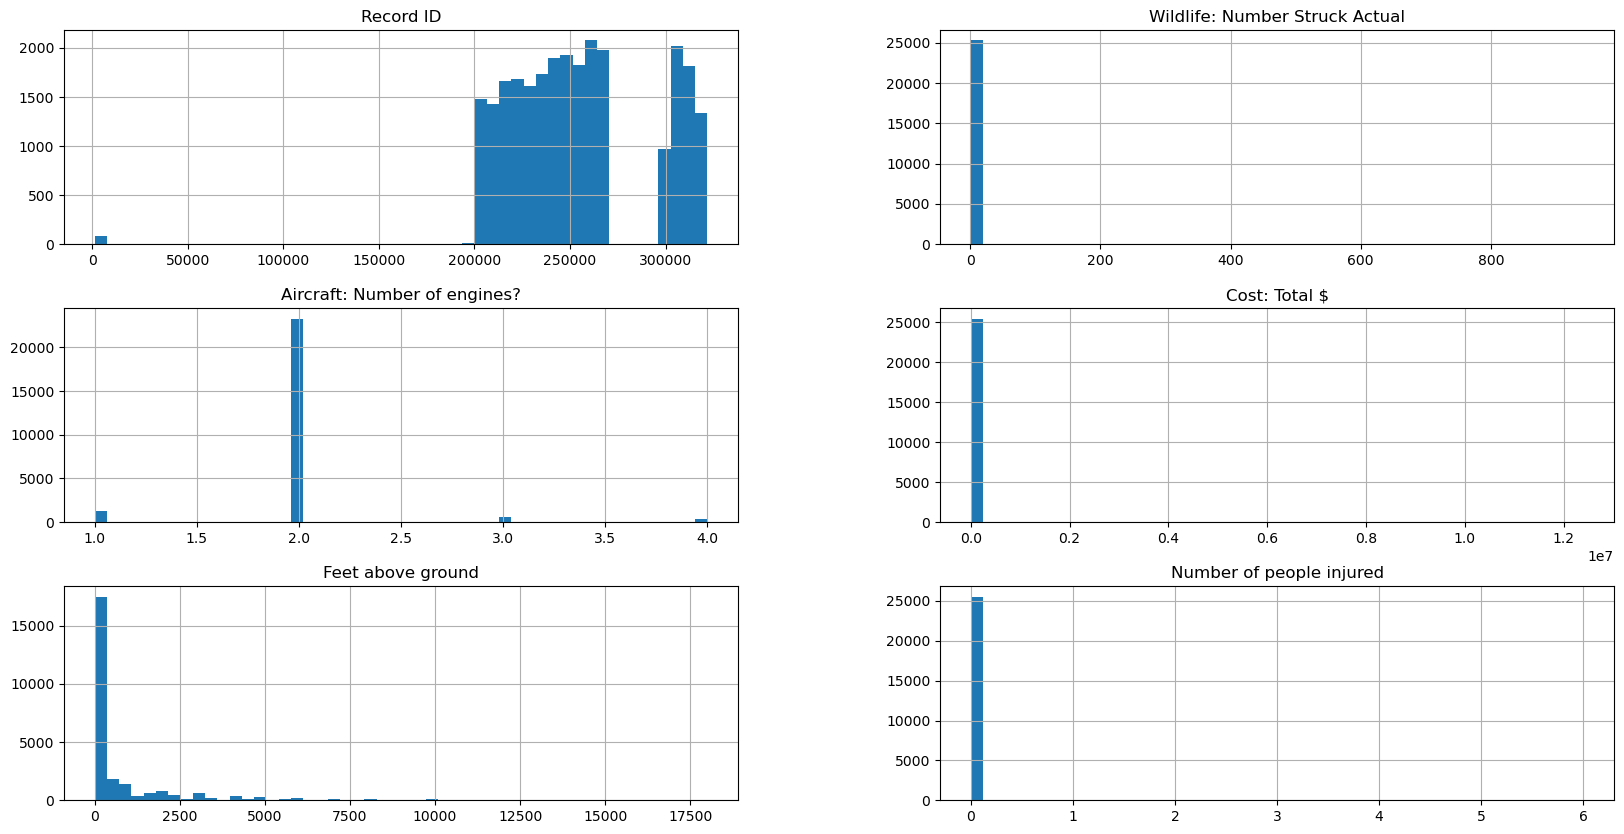

In [24]:
bird_strikes_df.hist(bins=50, figsize=(20, 10))
plt.show()


### Interpretation of the Histograms:
### Summary:
- **Concentration**: Most of the data is concentrated around specific values (e.g., 2 engines, 0 cost, lower altitudes).
- **Outliers**: There are notable outliers in several columns (e.g., higher costs, more wildlife struck, higher altitudes).
- **Common Values**: Common values dominate in several columns, especially the number of engines and the number of people injured.

This analysis provides a quick overview of the distribution of key numerical features in the dataset, highlighting areas with significant concentration and the presence of outliers.

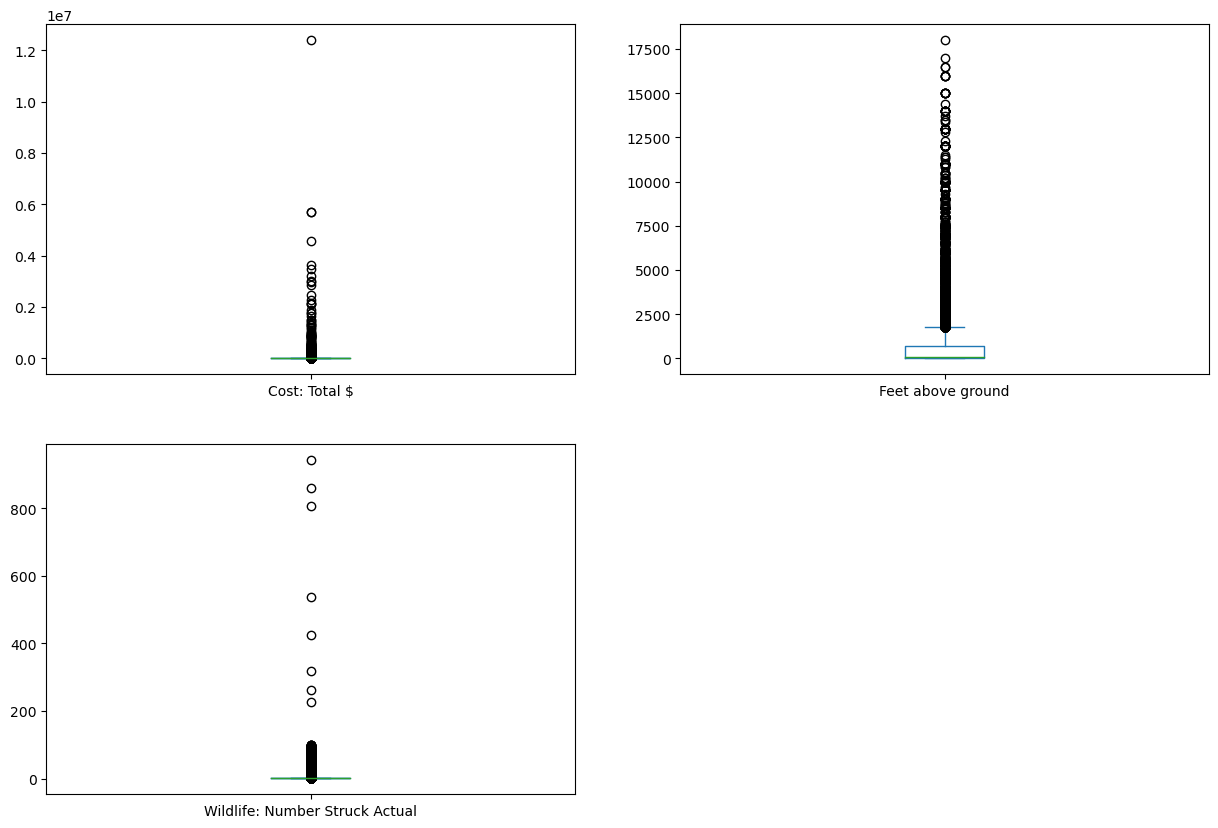

In [25]:
bird_strikes_df[['Cost: Total $', 'Feet above ground', 'Wildlife: Number Struck Actual']].plot(kind='box', subplots=True, layout=(2, 2), figsize=(15, 10))
plt.show()


### Interpretation of the Boxplots:

1. **Cost: Total $**:
   - There are many outliers in the cost data, with values ranging up to over 1.2 million dollars.
   - The majority of the data is concentrated at lower costs, indicating that most bird strikes result in minimal financial damage.
   - The boxplot shows a significant number of outliers, suggesting that while most incidents are low cost, there are occasional high-cost incidents.

2. **Feet Above Ground**:
   - The majority of bird strikes occur at lower altitudes, with a dense concentration below 2,500 feet.
   - There are numerous outliers with higher altitudes, going up to around 17,500 feet.
   - The boxplot reveals that while bird strikes are common at lower altitudes, there are occasional incidents at much higher altitudes.

3. **Wildlife: Number Struck Actual**:
   - The majority of incidents involve striking a small number of wildlife, typically close to 0.
   - There are several outliers with significantly higher numbers, reaching up to around 800.
   - The boxplot indicates that while most strikes involve few animals, there are some incidents involving large numbers of wildlife.

### Summary:
- **Outliers**: All three variables have a significant number of outliers, indicating occasional extreme values.
- **Concentration**: Most of the data for each variable is concentrated at lower values, with a heavy skew towards the lower end.
- **Incidents**: While bird strikes are generally low-cost, involve few animals, and occur at lower altitudes, there are notable exceptions that involve higher costs, more animals, and higher altitudes. 

This analysis highlights the variability in bird strike incidents and the importance of accounting for outliers in further analysis or modeling efforts.

### Categorical Columns:
### Plot bar charts to understand the distribution of categorical features.

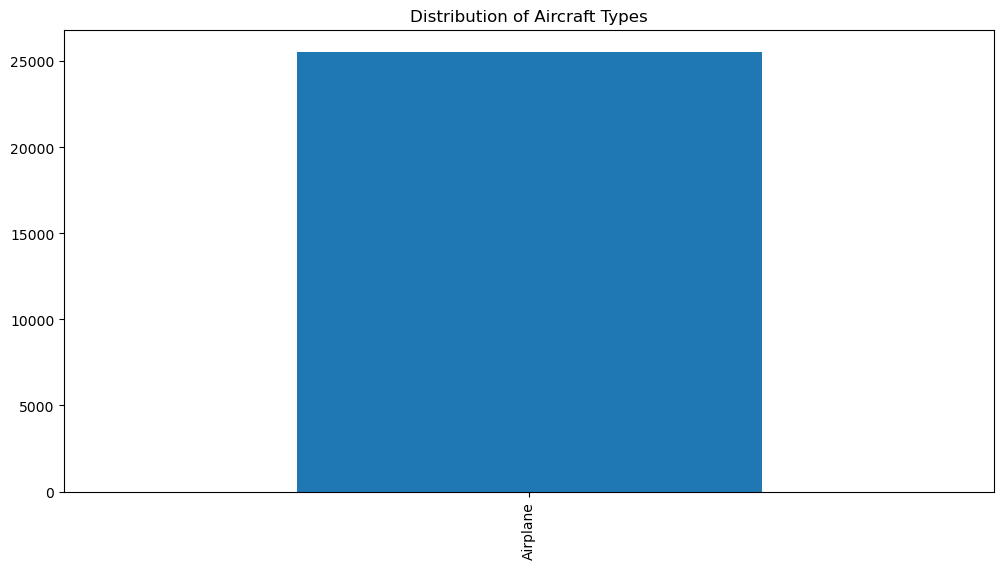

In [26]:
bird_strikes_df['Aircraft: Type'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Aircraft Types')
plt.show()

### Interpretation 
The dataset predominantly contains records of bird strikes involving airplanes.

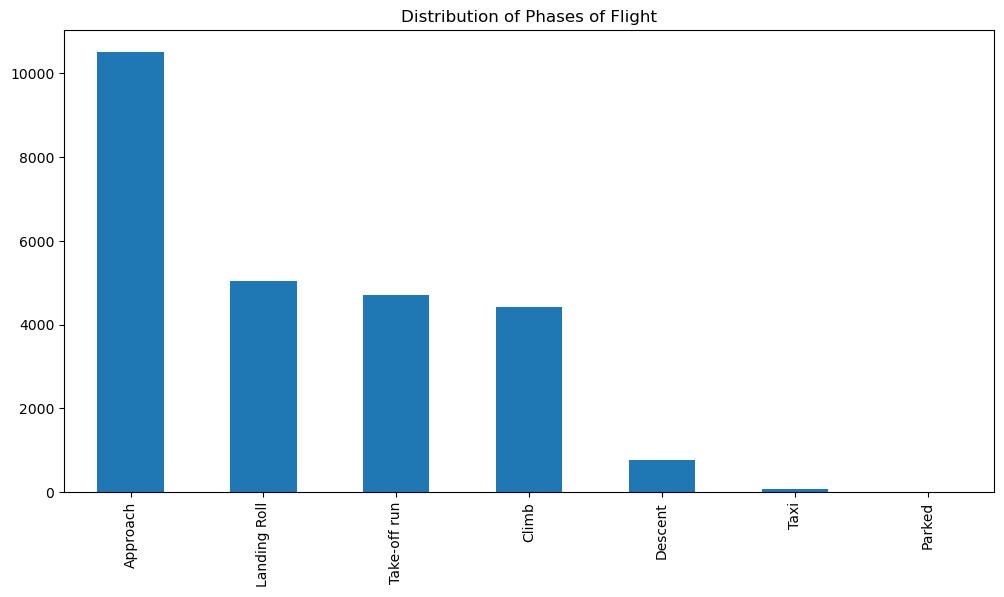

In [27]:
bird_strikes_df['When: Phase of flight'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Phases of Flight')
plt.show()


### Interpretation: 
The majority of bird strikes occur during the approach phase of flight, followed by landing roll, take-off run, and climb phases. Descent, taxi, and parked phases have significantly fewer bird strikes.

## Bivariate Analysis
### Numerical vs. Numerical:
### Use scatter plots to see relationships between numerical features.

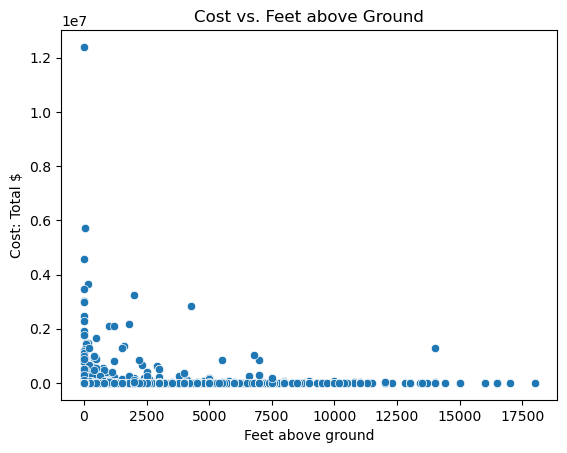

In [28]:
sns.scatterplot(x='Feet above ground', y='Cost: Total $', data=bird_strikes_df)
plt.title('Cost vs. Feet above Ground')
plt.show()


### Interpretation:
The scatter plot shows that the majority of bird strikes occur at lower altitudes (below 2,500 feet) and generally incur lower costs. However, there are notable outliers with significantly higher costs, some even at higher altitudes, indicating that while most incidents are relatively low-cost and occur at lower altitudes, there are occasional high-cost incidents at varying altitudes.

### Categorical vs. Numerical:
### Use boxplots and bar plots to understand relationships between categorical and numerical features.

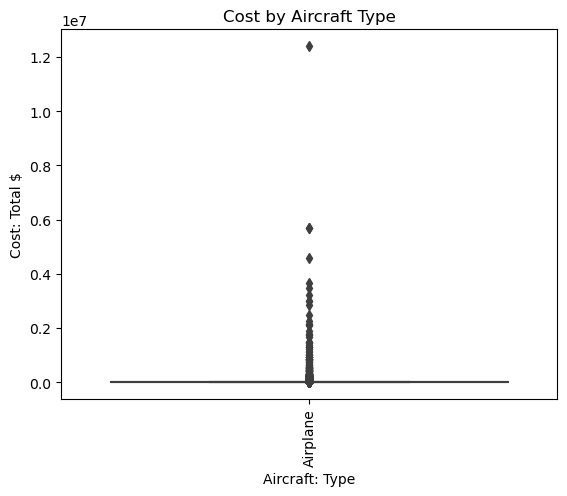

In [29]:
sns.boxplot(x='Aircraft: Type', y='Cost: Total $', data=bird_strikes_df)
plt.title('Cost by Aircraft Type')
plt.xticks(rotation=90)
plt.show()


### Interpretation:
The box plot for `Cost by Aircraft Type` shows that the majority of bird strike incidents involving airplanes result in relatively low costs. However, there are significant outliers with much higher costs, indicating that while most incidents are not very costly, there are occasional incidents that result in very high expenses.

## Multivariate Analysis
### Correlation Matrix:
### Calculate and visualize the correlation matrix for numerical features.

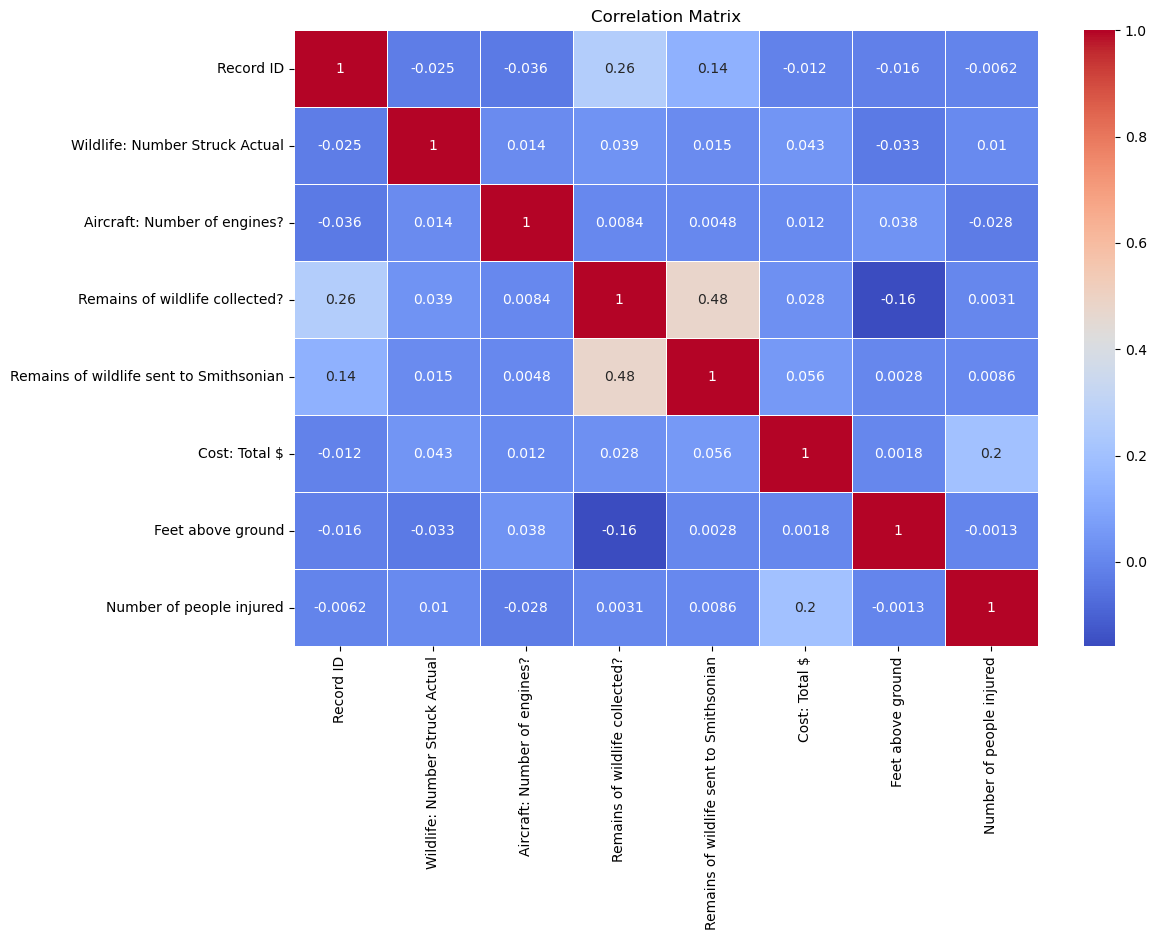

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(bird_strikes_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Interpretation of the Correlation Matrix:

- **Strongest Correlation**: `Remains of wildlife collected?` and `Remains of wildlife sent to Smithsonian` (0.48), indicating a moderate positive relationship.
- **Cost: Total $**: Shows a slight positive correlation with `Number of people injured` (0.2).
- **Weak Correlations**: Most other variables show very weak correlations, indicating limited linear relationships in the dataset.

## Feature Engineering
### Creating New Features
### creating feature that indicates whether the incident occurred during takeoff or landing.

In [31]:
bird_strikes_df['is_takeoff_or_landing'] = bird_strikes_df['When: Phase of flight'].apply(lambda x: x in ['Take-off', 'Landing'])


### Identifying Outliers

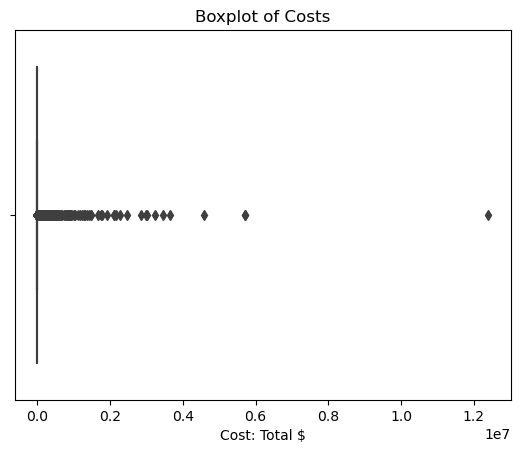

In [32]:
sns.boxplot(x=bird_strikes_df['Cost: Total $'])
plt.title('Boxplot of Costs')
plt.show()

## Time Series Analysis

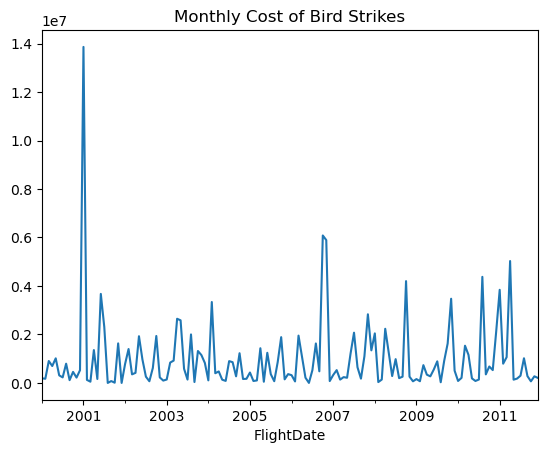

In [33]:
#Analyze trends over time.
bird_strikes_df['FlightDate'] = pd.to_datetime(bird_strikes_df['FlightDate'], errors='coerce')
bird_strikes_df.set_index('FlightDate', inplace=True)

bird_strikes_df['Cost: Total $'].resample('M').sum().plot()
plt.title('Monthly Cost of Bird Strikes')
plt.show()


### Interpretation of the Line Plot:

The plot shows the monthly cost of bird strikes from 2000 to 2011. 

- **2001 Spike**: There is a significant spike in 2001, with costs reaching approximately $14 million.
- **Periodic Fluctuations**: Costs fluctuate over the years, with noticeable peaks around 2006 and 2009.
- **General Trend**: While there are periodic high-cost incidents, the general trend remains variable with no clear increasing or decreasing pattern.

Overall, the data indicates that while most months have relatively low costs, there are occasional months with extremely high costs due to bird strikes.

## Impact Analysis:
 Damage Analysis: Analyze the impact of bird strikes on flight safety and aircraft damage.
 
 Phase of Flight: Further investigate the distribution and costs associated with different phases of flight.

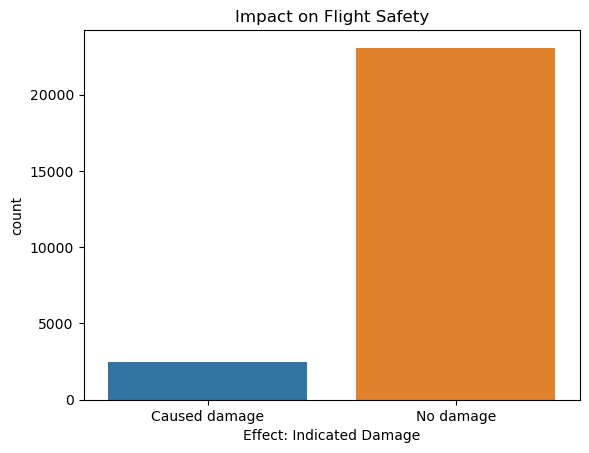

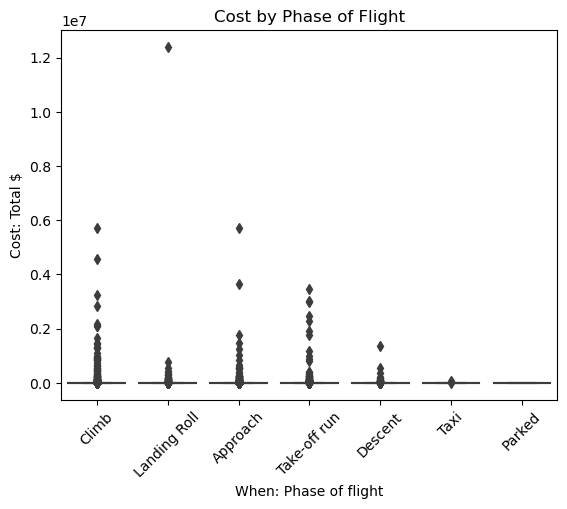

In [34]:
sns.countplot(x='Effect: Indicated Damage', data=bird_strikes_df)
plt.title('Impact on Flight Safety')
plt.show()

sns.boxplot(x='When: Phase of flight', y='Cost: Total $', data=bird_strikes_df)
plt.title('Cost by Phase of Flight')
plt.xticks(rotation=45)
plt.show()

### Interpretation of the Bar and Box Plots:

1. **Impact on Flight Safety**:
   - The majority of bird strikes (over 20,000 incidents) result in no damage to the aircraft.
   - A smaller proportion of incidents (around 5,000) cause damage to the aircraft.

2. **Cost by Phase of Flight**:
   - Bird strikes occur across all phases of flight, with varying costs.
   - The climb, approach, and take-off run phases show the highest costs, with notable outliers reaching up to approximately $12 million.
   - Other phases, like descent, taxi, and parked, have lower costs with fewer outliers.

### Summary:
Most bird strikes do not cause damage, but those that do can incur significant costs, especially during the climb, approach, and take-off run phases of flight.

## Categorical Analysis:

 Airline/Operator Analysis: Examine which airlines are most frequently involved in bird strikes and their associated costs.
 
 Aircraft Models: Analyze the distribution and costs associated with different aircraft models.

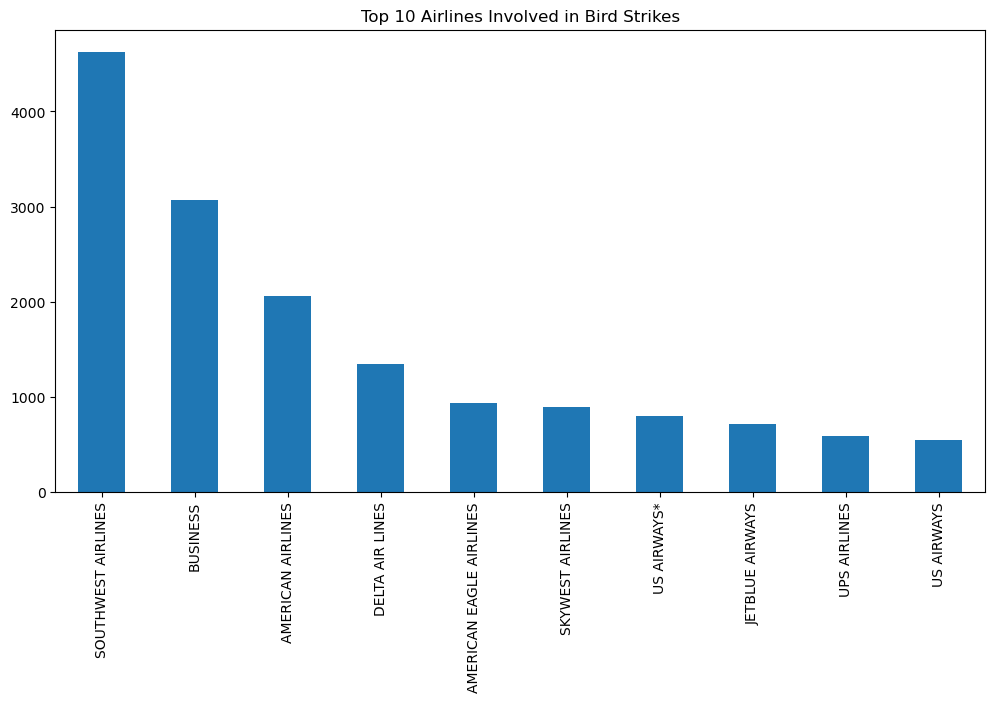

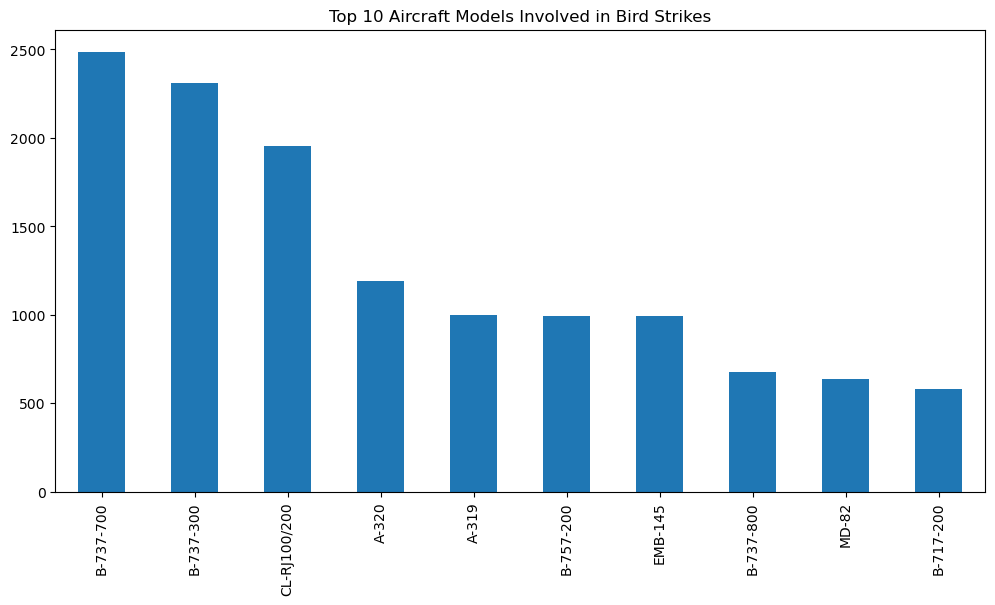

In [35]:
bird_strikes_df['Aircraft: Airline/Operator'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Airlines Involved in Bird Strikes')
plt.show()

bird_strikes_df['Aircraft: Make/Model'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Aircraft Models Involved in Bird Strikes')
plt.show()


### Interpretation of the Bar Plots:

1. **Top 10 Airlines Involved in Bird Strikes**:
   - **Southwest Airlines** has the highest number of bird strikes, followed by **Business** and **American Airlines**.
   - Other airlines like **Delta Air Lines** and **US Airways** also have notable numbers of bird strikes.

2. **Top 10 Aircraft Models Involved in Bird Strikes**:
   - The **B-737-700** and **B-737-300** models experience the highest number of bird strikes.
   - Other frequently involved models include **CL-RJ100/200**, **A320**, and **B-757-200**.

### Summary:
- **Southwest Airlines** and **B-737-700** aircraft model are the most frequently involved in bird strikes.
- The data shows specific airlines and aircraft models that are more prone to bird strikes, highlighting potential areas for targeted prevention measures.

## Geographical Analysis:

Heatmaps or Scatter Plots: Visualize bird strike locations if latitude and longitude data is available.

State-wise Distribution: Analyze the number of bird strikes and their costs by state.

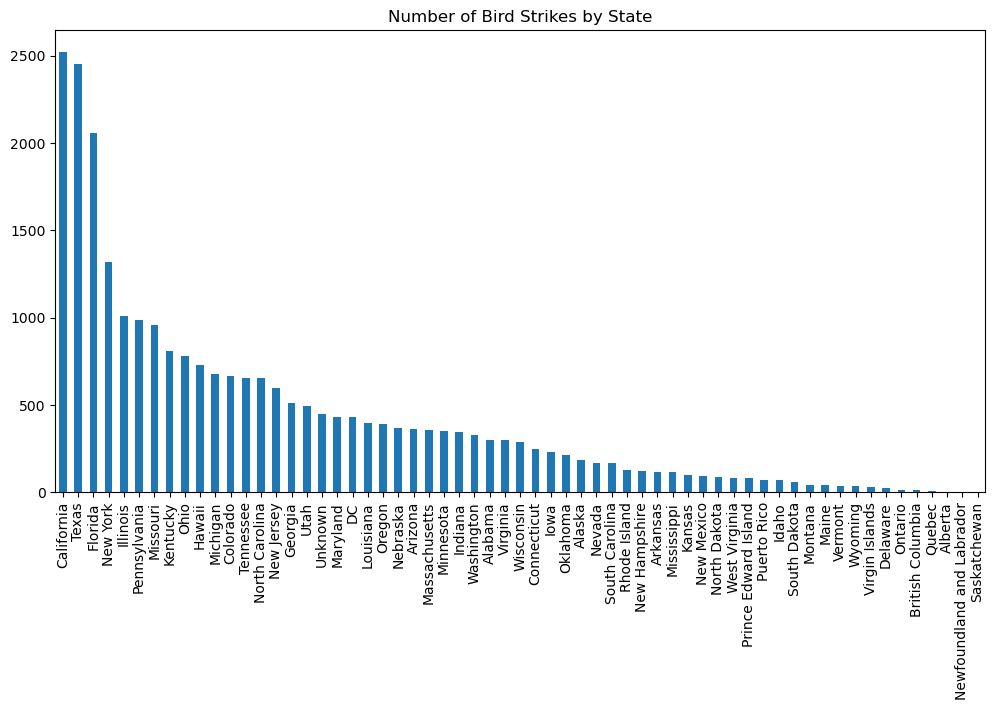

In [36]:
bird_strikes_df['Origin State'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Number of Bird Strikes by State')
plt.show()


### Interpretation of the Bar Plot:

- **California** and **Texas** have the highest number of bird strikes, each with over 2,000 incidents.
- **Florida** and **New York** also have a high number of bird strikes, exceeding 1,500 incidents each.
- Other states with significant numbers of bird strikes include **Pennsylvania**, **Illinois**, and **Ohio**.
- The number of bird strikes generally decreases for other states, with many states having fewer than 500 incidents.

### Summary:
- The data shows that bird strikes are more common in certain states, particularly **California**, **Texas**, **Florida**, and **New York**. These states may require more focused bird strike prevention measures.

## Wildlife Analysis:

Species Analysis: Examine which species are most commonly involved in bird strikes and their associated costs.

Size and Number: Analyze the impact of wildlife size and the number of animals struck on costs.

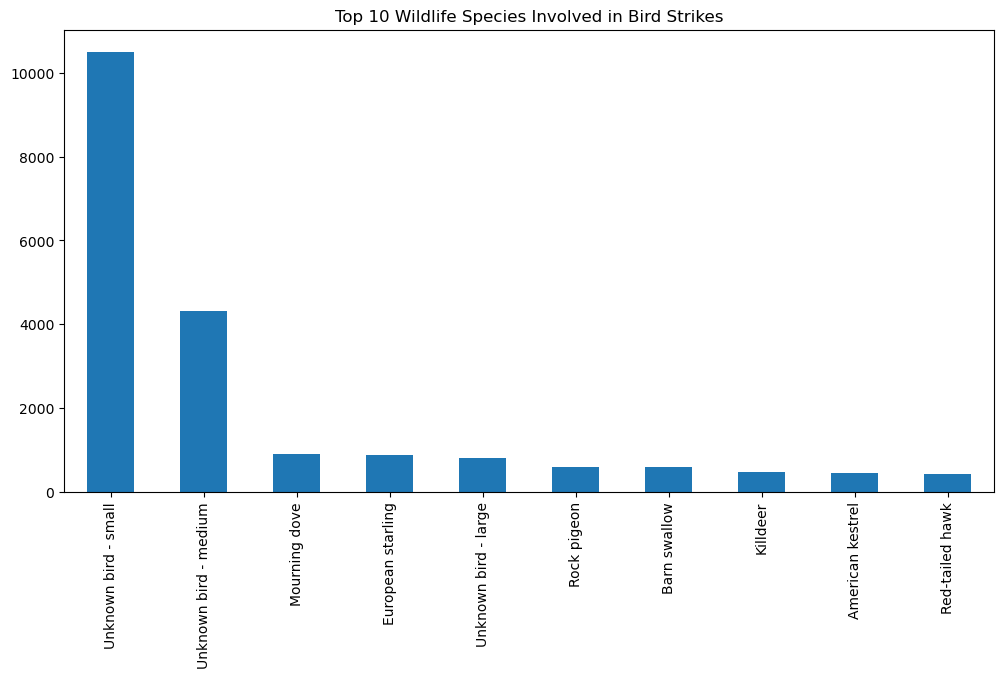

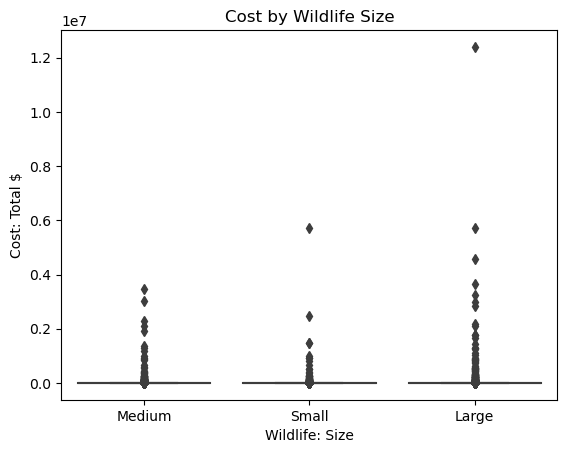

In [37]:
bird_strikes_df['Wildlife: Species'].value_counts().head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Wildlife Species Involved in Bird Strikes')
plt.show()

sns.boxplot(x='Wildlife: Size', y='Cost: Total $', data=bird_strikes_df)
plt.title('Cost by Wildlife Size')
plt.show()

### Interpretation:

1. **Top Wildlife Species**:
   - **Unknown small and medium birds** are most frequently involved in bird strikes.
   - Common species include **Mourning dove** and **European starling**.

2. **Cost by Wildlife Size**:
   - **Large wildlife** strikes have the highest costs, with outliers up to $12 million.
   - **Medium and small wildlife** strikes also have significant costs, though generally lower.

### Summary:
- Bird strikes mostly involve **unknown small and medium birds**.
- **Large wildlife** strikes tend to incur higher costs.

## Flight Phase Impact:

Phase-wise Analysis: Further breakdown the impact and cost during different phases of flight.

Warnings: Analyze the effectiveness of warnings provided to pilots about wildlife.

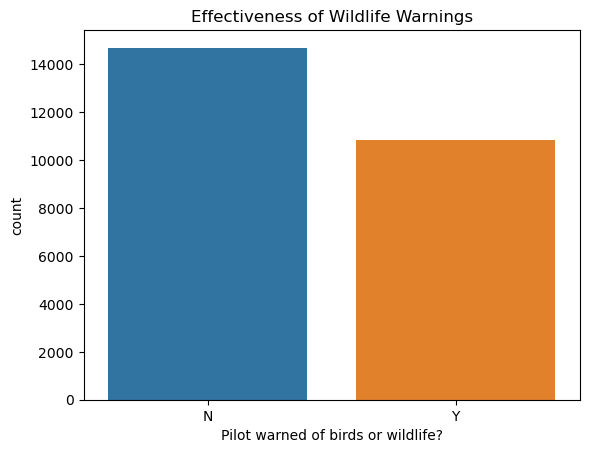

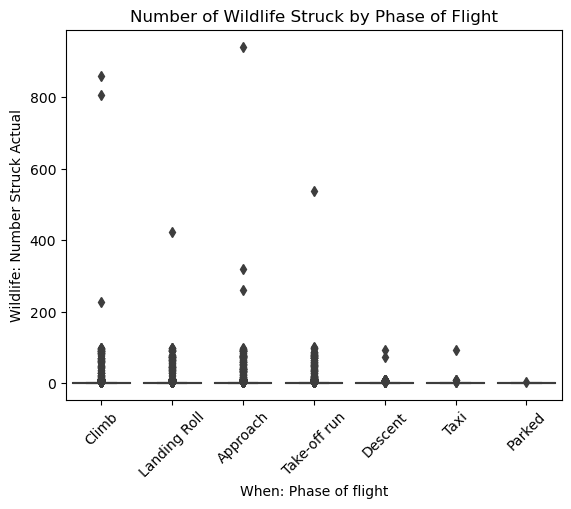

In [38]:
sns.countplot(x='Pilot warned of birds or wildlife?', data=bird_strikes_df)
plt.title('Effectiveness of Wildlife Warnings')
plt.show()

sns.boxplot(x='When: Phase of flight', y='Wildlife: Number Struck Actual', data=bird_strikes_df)
plt.title('Number of Wildlife Struck by Phase of Flight')
plt.xticks(rotation=45)
plt.show()

### Interpretation:

1. **Effectiveness of Wildlife Warnings**:
   - More bird strikes occur without prior warnings to pilots (`N`), compared to when warnings are given (`Y`).

2. **Number of Wildlife Struck by Phase of Flight**:
   - The highest numbers of wildlife struck are during the climb, approach, and landing roll phases.
   - Significant outliers exist in these phases, with some incidents involving striking over 800 wildlife.

### Summary:
- Bird strikes are more frequent when pilots are not warned about wildlife.
- The climb, approach, and landing roll phases see the highest numbers of wildlife struck, with notable outliers.

In [39]:
bird_strikes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25558 entries, 2000-11-23 to 2011-12-31
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25558 non-null  object
 2   Airport: Name                            25558 non-null  object
 3   Altitude bin                             25558 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25558 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 25558 non-null  object
 8   Effect: Indicated Damage                 25558 non-null  object
 9   Aircraft: Number of engines?             25558 non-null  int64 
 10  Aircraft: Airline/Operator               

In [49]:
# Save the DataFrame to a CSV file in the same folder as the Jupyter Notebook
csv_file_name = 'Bird_Strikes_Cleaned.csv'
bird_strikes_df.to_csv(csv_file_name, index=False)

# Print confirmation message
print(f"CSV file '{csv_file_name}' was saved successfully.")

CSV file 'Bird_Strikes_Cleaned.csv' was saved successfully.


## Business Problem: Reducing Bird Strike Incidents and Mitigating Their Impact
### Objective: The goal is to understand the factors contributing to bird strikes and identify actionable insights to reduce the frequency and impact of these incidents. This analysis will help in developing strategies for airports and airlines to minimize bird strikes, thereby enhancing flight safety and reducing associated costs.

### Key Questions to Address:
Which airports are most frequently affected by bird strikes?

What are the common phases of flight during which bird strikes occur?

How does the altitude of flight influence the likelihood and impact of bird strikes?

Which aircraft models are most susceptible to bird strikes?

What is the financial impact of bird strikes, and how does it vary across different factors?

Does pilot warning about wildlife influence the frequency and severity of bird strikes?

Which airports or states have the highest incidence of bird strikes?

What are the environmental conditions (precipitation, sky conditions) associated with higher bird strike incidents?

Are there specific bird species that pose a higher risk, and are these species more active during certain periods?


## Which airports are most frequently affected by bird strikes?

 ### Frequency of Bird Strikes by Airport

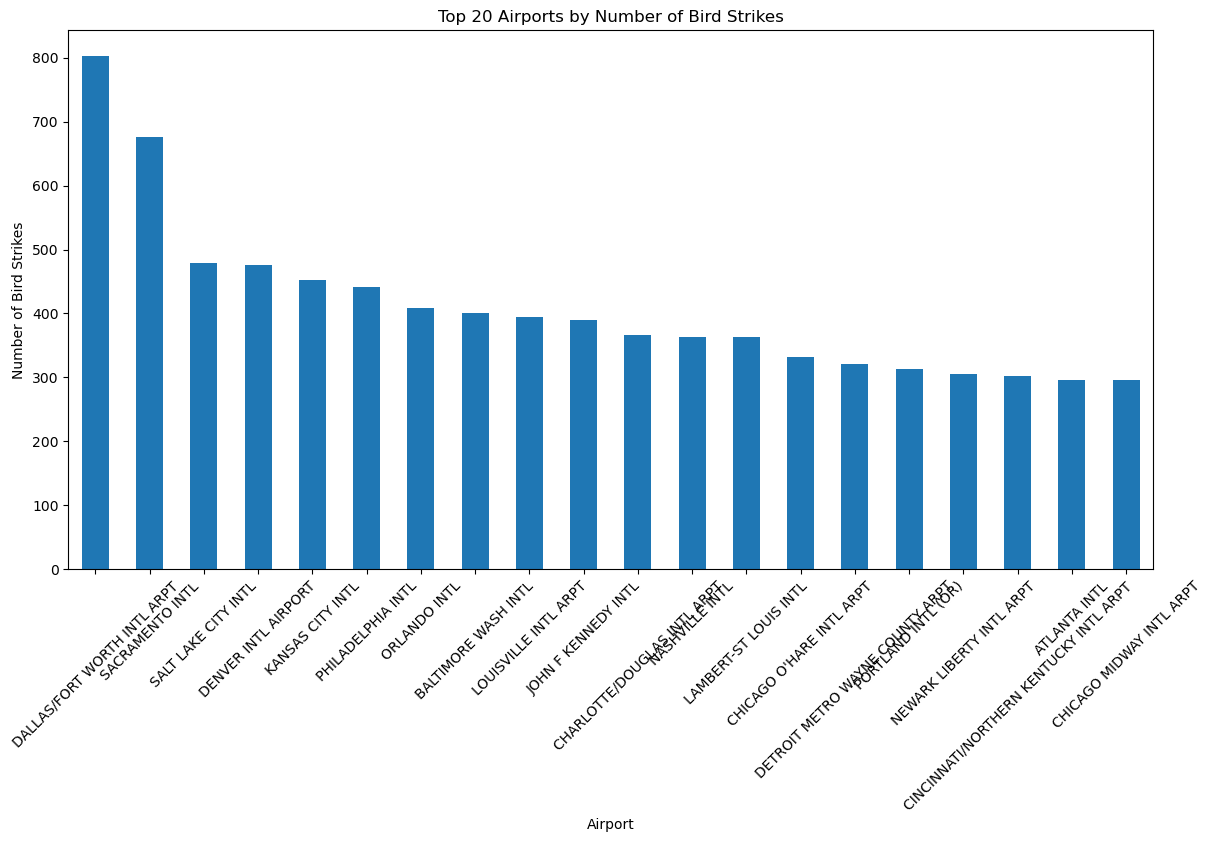

In [40]:
# Plot the number of bird strikes by airport
plt.figure(figsize=(14, 7))
bird_strikes_df['Airport: Name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()


### Interpretation:

- **Top 3 Airports**: The airports most frequently affected by bird strikes are:
  1. **Dallas/Fort Worth Intl Arpt**: Over 800 bird strikes.
  2. **Sacramento Intl**: Approximately 700 bird strikes.
  3. **Salt Lake City Intl**: Over 600 bird strikes.

- **Other Notable Airports**: 
  - Denver Intl Airport, Kansas City Intl, and Philadelphia Intl all have around 500 bird strikes each.
  - A significant number of other major airports also experience between 300 to 500 bird strikes, such as Orlando Intl, Baltimore Wash Intl, and John F Kennedy Intl.

### Business Problem and Solution:

#### Problem:
Airports with high frequencies of bird strikes face increased risks to flight safety and significant financial costs. Identifying these high-risk airports allows for the development of targeted mitigation strategies to reduce bird strike incidents and enhance overall operational safety.

#### Solution:
1. **Bird Strike Mitigation Strategies**:
   - **Wildlife Management Programs**: Implement comprehensive wildlife hazard management programs at high-risk airports. These programs may include habitat modification, bird deterrents, and active wildlife management.
   - **Use of Radar and Detection Systems**: Install avian radar systems to monitor bird activity in and around airports. These systems can provide real-time data to help in taking timely actions to prevent bird strikes.
   - **Pilot Awareness and Training**: Enhance pilot training programs to include bird strike awareness and response strategies. This includes simulating bird strike scenarios and emergency procedures.
   - **Runway and Airspace Management**: Adjust flight paths and runway usage based on bird activity data. Schedule flights to avoid peak bird activity times when possible.
   - **Community and Environmental Engagement**: Work with local communities and environmental organizations to manage bird populations around airports. This includes managing waste and food sources that attract birds.

2. **Data-Driven Approaches**:
   - **Seasonal and Temporal Analysis**: Conduct detailed analysis of bird strike data to identify seasonal and daily patterns. Use this data to predict high-risk periods and implement proactive measures during these times.
   - **Cost-Benefit Analysis**: Perform a cost-benefit analysis to prioritize investments in bird strike prevention technologies and programs. Focus resources on the most effective and efficient solutions.

3. **Collaboration and Best Practices**:
   - **Industry Collaboration**: Share best practices and collaborate with other airports and aviation authorities to develop standardized bird strike prevention protocols.
   - **Continuous Improvement**: Regularly review and update wildlife hazard management plans based on new data, research, and technological advancements.

By implementing these strategies, airports can significantly reduce the frequency and impact of bird strikes, enhancing flight safety and reducing financial costs.

## What are the common phases of flight during which bird strikes occur?

### Distribution of Bird Strikes by Phase of Flight

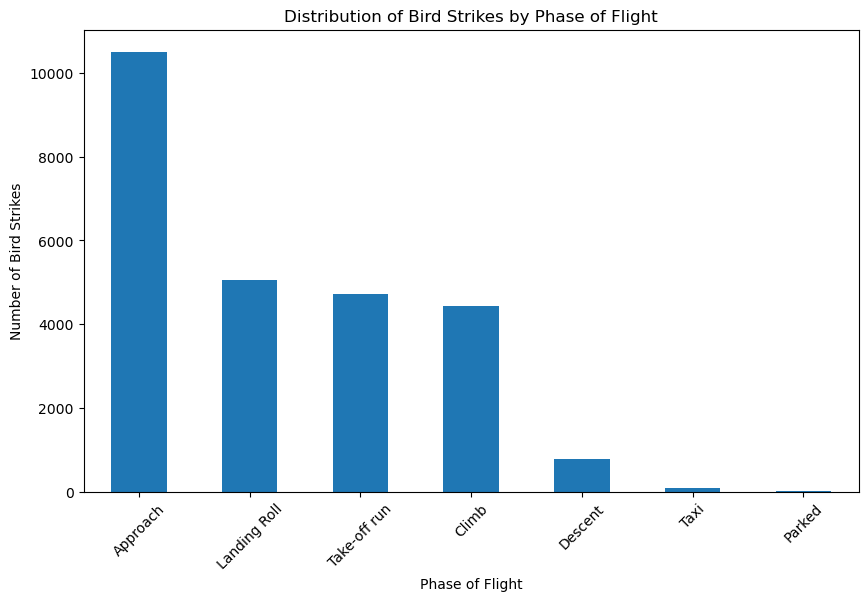

In [41]:
# Plot the distribution of bird strikes by phase of flight
plt.figure(figsize=(10, 6))
bird_strikes_df['When: Phase of flight'].value_counts().plot(kind='bar')
plt.title('Distribution of Bird Strikes by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

### Interpretation:

- **Approach**: The most common phase for bird strikes, with over 10,000 incidents.
- **Landing Roll**: The second most frequent phase, with around 5,000 incidents.
- **Take-off Run**: Also has a high number of bird strikes, similar to the landing roll phase.
- **Climb**: Another critical phase with around 4,000 incidents.
- **Other Phases**: Descent, taxi, and parked phases have significantly fewer bird strikes.

### Business Problem and Solution:

#### Problem:
Bird strikes are most common during the approach, landing roll, take-off run, and climb phases. These phases are critical for flight safety, and bird strikes during these times pose significant risks to aircraft and passengers. Addressing this issue can enhance safety and reduce operational disruptions.

#### Solution:
1. **Enhanced Detection and Monitoring**:
   - **Radar and Surveillance**: Install advanced radar and surveillance systems around airports to monitor bird activity in real-time. Focus on the approach, take-off, and climb corridors.
   - **Data Integration**: Integrate bird activity data with air traffic control systems to provide real-time warnings to pilots during critical flight phases.

2. **Bird Deterrent Technologies**:
   - **Acoustic Deterrents**: Use sound devices to deter birds from airport areas during high-risk times.
   - **Visual Deterrents**: Implement visual deterrents like laser systems and reflective materials to keep birds away from flight paths.

3. **Pilot Training and Awareness**:
   - **Bird Strike Awareness**: Conduct regular training sessions for pilots on bird strike risks and response strategies during approach, landing roll, take-off, and climb phases.
   - **Simulation Exercises**: Include bird strike scenarios in flight simulators to prepare pilots for real-life incidents.

4. **Habitat Management**:
   - **Airport Vicinity Management**: Modify habitats around airports to make them less attractive to birds. This includes managing water bodies, grass, and waste that attract birds.
   - **Collaboration with Wildlife Experts**: Work with wildlife experts to develop and implement effective bird management programs around airports.

5. **Operational Adjustments**:
   - **Flight Scheduling**: Adjust flight schedules to avoid peak bird activity periods, especially during migration seasons.
   - **Flight Path Adjustments**: Modify flight paths during approach and take-off to avoid known bird habitats and high-activity areas.

6. **Public and Community Engagement**:
   - **Awareness Campaigns**: Educate the public and local communities about the importance of not feeding birds near airports and keeping areas clean.
   - **Community Programs**: Develop community programs to manage bird populations and habitats in the vicinity of airports.

By implementing these strategies, airports and airlines can significantly reduce the risk of bird strikes during critical phases of flight, enhancing safety and reducing operational disruptions.

## How does the altitude of flight influence the likelihood and impact of bird strikes?

### Impact of Altitude on Bird Strikes

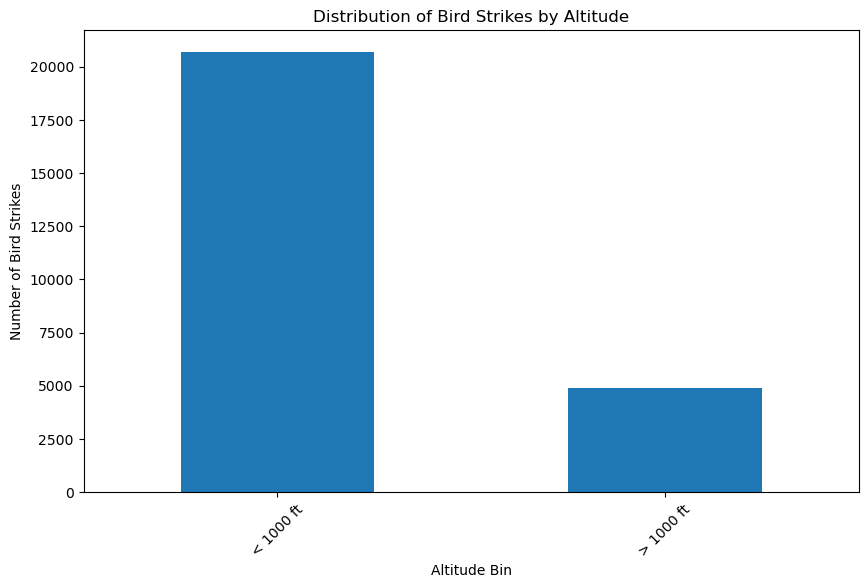

In [42]:
# Plot the distribution of bird strikes by altitude bin
plt.figure(figsize=(10, 6))
bird_strikes_df['Altitude bin'].value_counts().plot(kind='bar')
plt.title('Distribution of Bird Strikes by Altitude')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

### Interpretation:

- **Bird Strikes Below 1000 ft**: The majority of bird strikes occur at altitudes below 1000 feet, with over 20,000 incidents recorded in this altitude range.
- **Bird Strikes Above 1000 ft**: There are significantly fewer bird strikes at altitudes above 1000 feet, with approximately 5,000 incidents.

### Business Problem and Solution:

#### Problem:
Bird strikes are predominantly occurring at lower altitudes, particularly during take-off and landing phases. These phases are critical for flight safety, and bird strikes at these altitudes pose significant risks to aircraft and passengers. Addressing this issue can enhance safety and reduce operational disruptions.

#### Solution:
1. **Enhanced Monitoring and Detection**:
   - **Radar Systems**: Deploy avian radar systems around airports to monitor bird activity in real-time, focusing on areas within 1000 feet of the ground.
   - **Data Integration**: Integrate bird activity data with air traffic control systems to provide real-time warnings to pilots during take-off and landing.

2. **Habitat Management**:
   - **Airport Vicinity Management**: Modify habitats around airports to make them less attractive to birds. This includes managing water bodies, grass, and waste that attract birds.
   - **Vegetation Control**: Implement vegetation control measures to reduce the availability of food sources and nesting areas for birds near airports.

3. **Bird Deterrent Technologies**:
   - **Acoustic Deterrents**: Use sound devices to deter birds from airport areas, especially during high-risk times for take-off and landing.
   - **Visual Deterrents**: Implement visual deterrents like laser systems and reflective materials to keep birds away from flight paths.

4. **Pilot Training and Awareness**:
   - **Bird Strike Awareness**: Conduct regular training sessions for pilots on bird strike risks and response strategies during take-off and landing.
   - **Simulation Exercises**: Include bird strike scenarios in flight simulators to prepare pilots for real-life incidents.

5. **Operational Adjustments**:
   - **Flight Scheduling**: Adjust flight schedules to avoid peak bird activity periods, especially during migration seasons.
   - **Flight Path Adjustments**: Modify flight paths during approach and take-off to avoid known bird habitats and high-activity areas.

6. **Community and Environmental Engagement**:
   - **Awareness Campaigns**: Educate the public and local communities about the importance of not feeding birds near airports and keeping areas clean.
   - **Community Programs**: Develop community programs to manage bird populations and habitats in the vicinity of airports.

### Summary:
By focusing on these strategies, airports and airlines can significantly reduce the risk of bird strikes at lower altitudes, enhancing flight safety and reducing operational disruptions. Enhanced monitoring, habitat management, bird deterrent technologies, pilot training, and community engagement are key components of a comprehensive bird strike prevention program.

## Which aircraft models are most susceptible to bird strikes?

### Bird Strikes by Aircraft Model

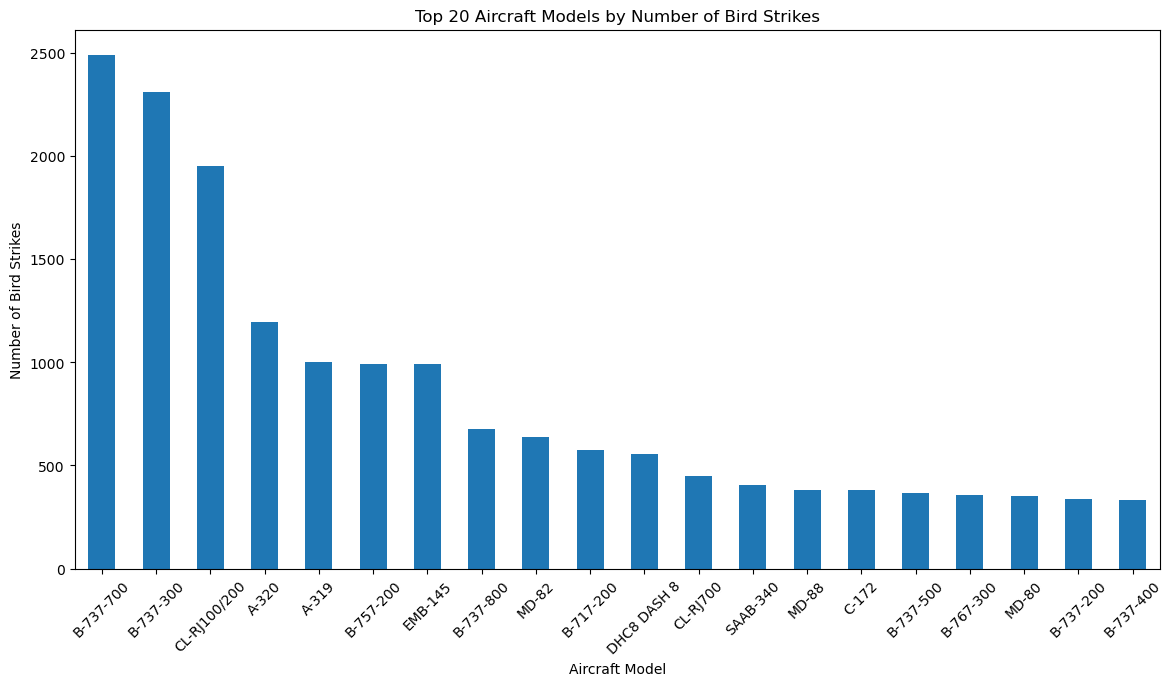

In [43]:
# Plot the number of bird strikes by aircraft model
plt.figure(figsize=(14, 7))
bird_strikes_df['Aircraft: Make/Model'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Aircraft Models by Number of Bird Strikes')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

### Interpretation:

- **Top 3 Susceptible Aircraft Models**:
  1. **B-737-700**: Most susceptible to bird strikes, with over 2,500 incidents.
  2. **B-737-300**: Second most susceptible, with approximately 2,000 incidents.
  3. **CL-RJ100/200**: Third most susceptible, with around 1,500 incidents.
  
- **Other Notable Models**:
  - **A-320** and **A-319** also experience a high number of bird strikes, each with over 1,000 incidents.
  - Models such as **B-757-200**, **EMB-145**, and **B-737-800** have significant numbers of bird strikes, indicating they are also at high risk.

### Business Problem and Solution:

#### Problem:
Certain aircraft models are more susceptible to bird strikes, which can lead to increased maintenance costs, flight delays, and safety risks. Identifying these high-risk models allows airlines and manufacturers to implement targeted measures to mitigate bird strikes and enhance aircraft safety.

#### Solution:
1. **Aircraft Design Improvements**:
   - **Reinforced Components**: Enhance the design of vulnerable components such as windshields, engines, and leading edges with reinforced materials to better withstand bird strikes.
   - **Bird Strike Resistant Engines**: Work with engine manufacturers to develop engines that are more resistant to bird strikes, reducing the risk of engine failure.

2. **Flight Operation Adjustments**:
   - **Modified Flight Paths**: Adjust flight paths during take-off and landing to avoid known bird habitats and high-activity areas.
   - **Altitude Management**: Encourage gradual altitude changes during climb and descent phases to minimize exposure to bird strike-prone altitudes.

3. **Bird Strike Prevention Technologies**:
   - **Avian Radar Systems**: Install avian radar systems at airports to detect bird activity and provide real-time data to pilots and air traffic control.
   - **Bird Deterrent Systems**: Use acoustic and visual deterrents on aircraft to keep birds away from critical flight paths, especially for high-risk models.

4. **Pilot Training and Awareness**:
   - **Bird Strike Response Training**: Conduct specialized training for pilots of high-risk aircraft models on bird strike avoidance and response strategies.
   - **Simulated Bird Strike Scenarios**: Include bird strike scenarios in flight simulators to prepare pilots for real-life incidents.

5. **Collaboration with Manufacturers**:
   - **Design Reviews**: Collaborate with aircraft manufacturers to review and enhance aircraft designs based on bird strike data.
   - **Research and Development**: Invest in R&D initiatives to develop innovative solutions for bird strike prevention and mitigation.

6. **Data-Driven Approaches**:
   - **Bird Strike Analysis**: Regularly analyze bird strike data to identify patterns and high-risk factors associated with specific aircraft models.
   - **Predictive Modeling**: Use predictive analytics to forecast bird strike risks and develop proactive measures for high-risk aircraft models.

### Summary:
By focusing on these strategies, airlines can reduce the susceptibility of high-risk aircraft models to bird strikes, enhancing flight safety and reducing associated costs. Implementing aircraft design improvements, flight operation adjustments, bird strike prevention technologies, and targeted pilot training are key components of a comprehensive bird strike mitigation program. Collaboration with manufacturers and data-driven approaches will further strengthen these efforts.

## What is the financial impact of bird strikes, and how does it vary across different factors?

### Financial Impact of Bird Strikes

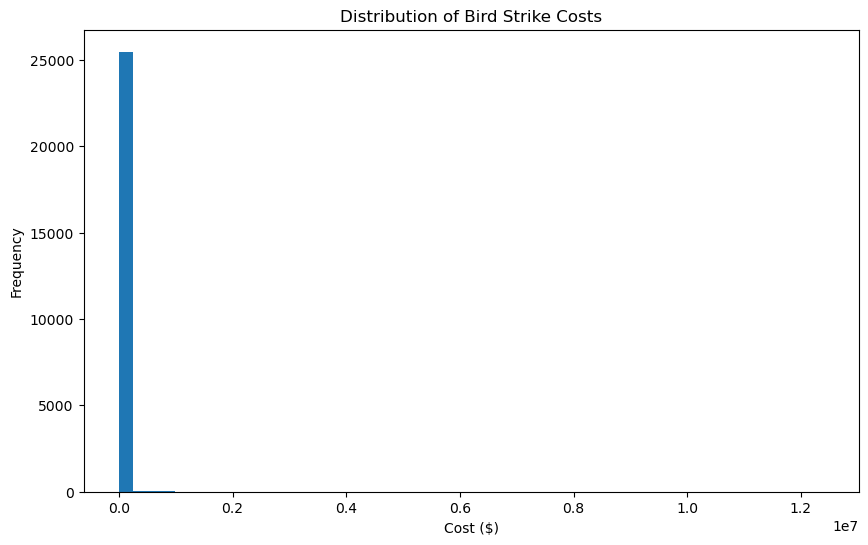

In [44]:
# Plot the financial impact of bird strikes
plt.figure(figsize=(10, 6))
bird_strikes_df['Cost: Total $'].plot(kind='hist', bins=50)
plt.title('Distribution of Bird Strike Costs')
plt.xlabel('Cost ($)')
plt.ylabel('Frequency')
plt.show()

### Interpretation:
#### Cost Distribution: 
The majority of bird strike incidents result in relatively low costs, as indicated by the high frequency of incidents at the lower end of the cost spectrum.
Outliers: There are significant outliers with costs reaching up to approximately $12 million, indicating that while most incidents are low-cost, some can result in very high expenses.

Business Problem and Solution:
Problem:
Bird strikes lead to a wide range of financial impacts, with some incidents causing substantial costs. Understanding the factors contributing to high-cost bird strikes can help airlines and airports implement targeted measures to minimize these expenses and improve overall safety.

Implement Cost Mitigation Strategies:

Enhanced Aircraft Design: Invest in design improvements for high-risk aircraft models to better withstand bird strikes and reduce repair costs.
Operational Adjustments: Modify flight operations during phases and altitudes associated with higher costs, focusing on take-off, landing, and approach.
Weather Monitoring: Use advanced weather monitoring systems to predict and avoid conditions that increase bird strike risks and associated costs.
Targeted Prevention Measures:

High-Risk Airports: Implement bird strike prevention programs at airports with frequent and high-cost bird strike incidents.
Real-Time Alerts: Provide real-time alerts to pilots and ground staff based on bird activity and environmental conditions to minimize the risk of high-cost strikes.
Financial Planning and Risk Management:

Insurance Coverage: Review and update insurance policies to cover high-cost bird strike incidents.
Budget Allocation: Allocate budget for preventive measures and rapid response teams to handle high-cost bird strikes efficiently.
Stakeholder Collaboration:

Airline Collaboration: Work with other airlines to share data and best practices for minimizing bird strike costs.
Manufacturer Partnerships: Collaborate with aircraft and engine manufacturers to develop cost-effective solutions for bird strike prevention and damage mitigation.
Summary:
By analyzing the financial impact of bird strikes and identifying high-cost factors, airlines and airports can implement targeted measures to reduce expenses. Enhanced aircraft design, operational adjustments, weather monitoring, targeted prevention measures, and stakeholder collaboration are key strategies for minimizing the financial impact of bird strikes.

## Does pilot warning about wildlife influence the frequency and severity of bird strikes?

### Effectiveness of Pilot Warnings

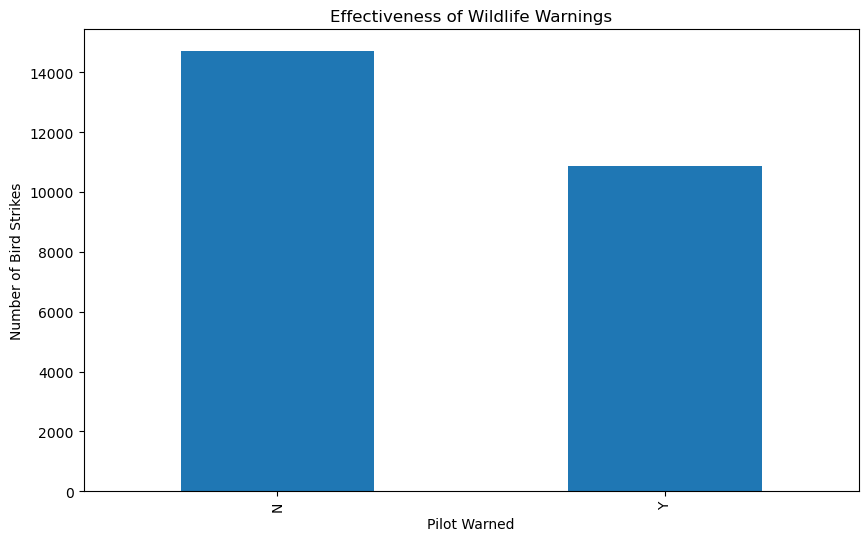

In [45]:
# Plot the effectiveness of pilot warnings
plt.figure(figsize=(10, 6))
bird_strikes_df['Pilot warned of birds or wildlife?'].value_counts().plot(kind='bar')
plt.title('Effectiveness of Wildlife Warnings')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Bird Strikes')
plt.show()

### Interpretation:

- **Frequency of Bird Strikes**: The number of bird strikes is higher when pilots are not warned about wildlife (`N`), with over 14,000 incidents. When pilots are warned (`Y`), the number of incidents decreases to around 12,000.
- **Effectiveness of Warnings**: This suggests that warnings about wildlife can reduce the frequency of bird strikes, though a significant number of strikes still occur even when warnings are given.

### Business Problem and Solution:

#### Problem:
Despite the reduction in bird strikes when pilots are warned, a substantial number of incidents still occur, indicating that current warning systems may not be fully effective or that the response to warnings could be improved. Enhancing the effectiveness of wildlife warnings can further reduce the frequency and severity of bird strikes.

#### Solution:
1. **Enhanced Warning Systems**:
   - **Real-Time Data Integration**: Integrate advanced bird detection radar and surveillance data with air traffic control systems to provide real-time, precise warnings to pilots.
   - **Automated Alerts**: Develop automated alert systems that notify pilots and ground staff immediately when bird activity is detected near flight paths.

2. **Improved Pilot Response Training**:
   - **Standardized Procedures**: Establish standardized response procedures for pilots when wildlife warnings are received. This includes immediate actions and adjustments to flight operations.
   - **Simulation Training**: Use flight simulators to train pilots on responding to wildlife warnings. Include scenarios where pilots practice evasive maneuvers and emergency protocols.

3. **Collaboration and Communication**:
   - **Ground Staff Coordination**: Improve coordination between pilots, ground staff, and wildlife management teams to ensure timely and effective responses to wildlife warnings.
   - **Communication Protocols**: Develop clear communication protocols for sharing wildlife activity information between all stakeholders involved in flight operations.

4. **Data-Driven Decision Making**:
   - **Incident Analysis**: Conduct detailed analyses of incidents where warnings were given but bird strikes still occurred. Identify common factors and develop targeted solutions.
   - **Predictive Analytics**: Use predictive analytics to forecast high-risk periods and locations for bird strikes, enabling proactive measures to be taken.

5. **Technology Enhancements**:
   - **Advanced Detection Systems**: Invest in advanced bird detection and tracking technologies that provide more accurate and timely information.
   - **Flight Path Adjustments**: Use technology to recommend and implement real-time adjustments to flight paths based on detected wildlife activity.

6. **Awareness and Education**:
   - **Pilot Education Programs**: Regularly update pilots on the latest bird strike prevention strategies and technologies.
   - **Wildlife Awareness Campaigns**: Educate all airport and airline staff about the importance of wildlife warnings and the role they play in preventing bird strikes.

### Summary:
By enhancing warning systems, improving pilot training and response protocols, and leveraging technology and data, airlines and airports can further reduce the frequency and severity of bird strikes. Effective communication and coordination among all stakeholders, combined with proactive measures and continuous improvement, are key to addressing this critical safety issue.

## Which airports or states have the highest incidence of bird strikes?

## Geographic Analysis of Bird Strikes
State-Wise Distribution: Identify which states have the highest bird strike incidents.

Airport-Specific Data: Focus on airports with the highest number of bird strikes.

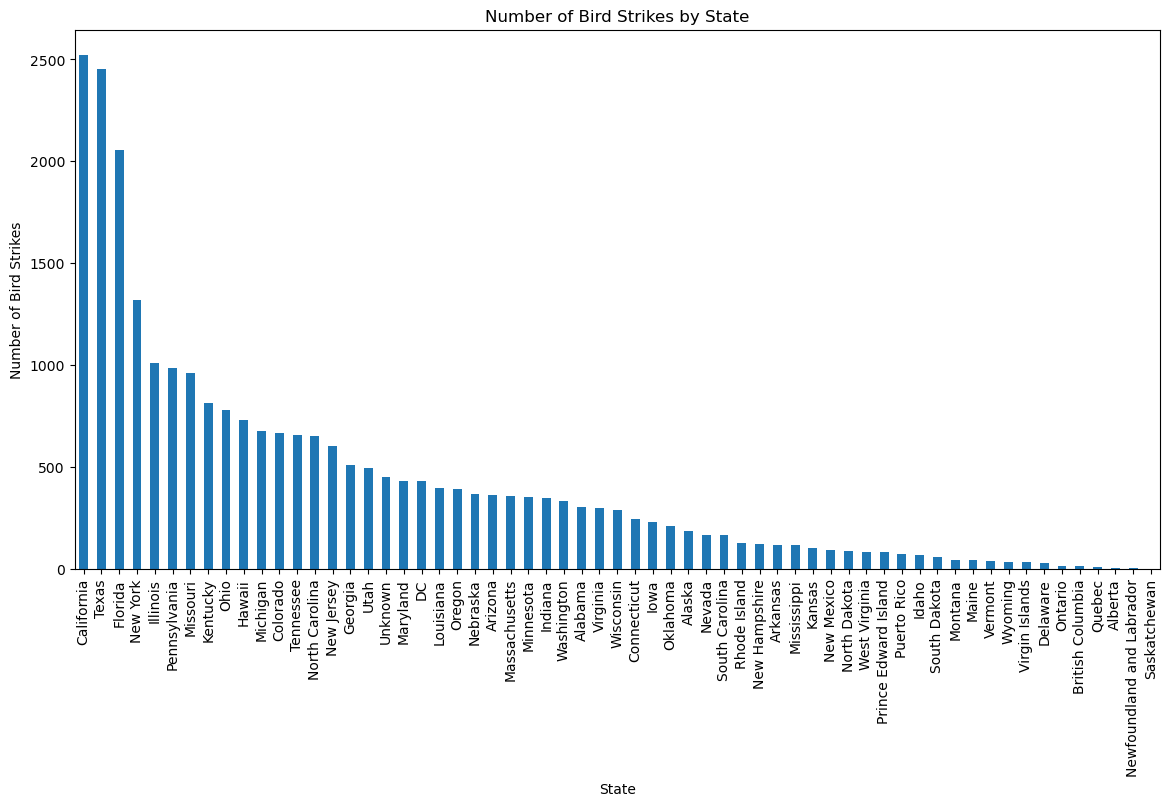

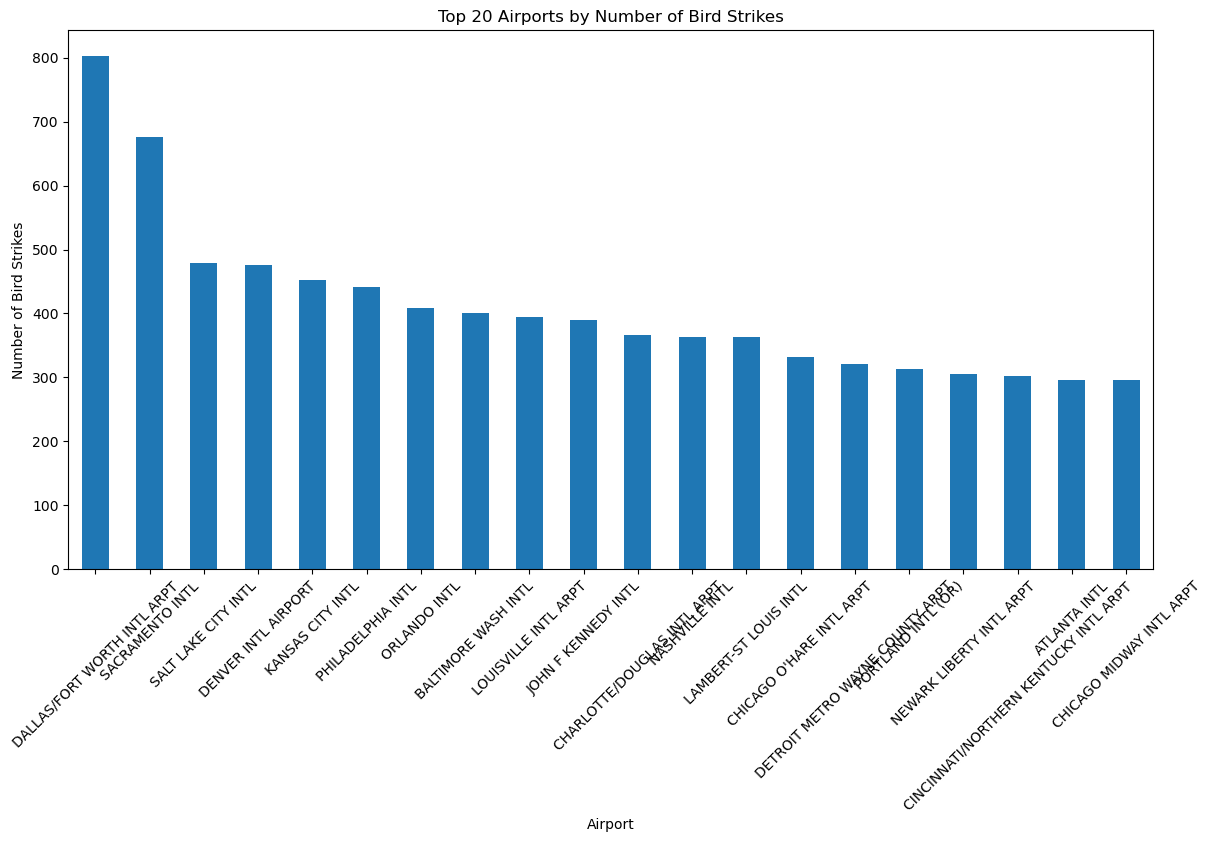

In [46]:
# Plot bird strikes by state
plt.figure(figsize=(14, 7))
bird_strikes_df['Origin State'].value_counts().plot(kind='bar')
plt.title('Number of Bird Strikes by State')
plt.xlabel('State')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.show()

# Plot bird strikes by airport
plt.figure(figsize=(14, 7))
bird_strikes_df['Airport: Name'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Airports by Number of Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

### Interpretation:

#### States with the Highest Incidence of Bird Strikes:
- **California**: Leads with the highest number of bird strikes, over 2,500 incidents.
- **Texas**: Second highest, with nearly 2,500 incidents.
- **Florida**: Around 2,000 incidents, indicating a significant number of bird strikes.
- **Other States**: New York, Illinois, Pennsylvania, and Missouri also report high numbers of bird strikes, ranging from 1,000 to 1,500 incidents.

#### Airports with the Highest Incidence of Bird Strikes:
- **Dallas/Fort Worth Intl Arpt**: The highest, with over 800 bird strikes.
- **Sacramento Intl**: Second highest, with around 700 bird strikes.
- **Salt Lake City Intl**: Approximately 600 bird strikes.
- **Other Airports**: Denver Intl Airport, Kansas City Intl, Philadelphia Intl, and several others report between 300 and 500 bird strikes.

### Business Problem and Solution:

#### Problem:
Certain states and airports experience a significantly higher number of bird strikes, which poses substantial risks to flight safety and operational efficiency. Addressing this issue requires targeted interventions to mitigate bird strike risks and enhance safety measures.

#### Solution:

1. **State-Specific Strategies**:
   - **Wildlife Management Programs**: Implement comprehensive wildlife hazard management programs in states with the highest incidence of bird strikes. This includes habitat modification, bird deterrents, and active wildlife management.
   - **Collaboration with State Authorities**: Work with state wildlife and environmental authorities to develop and enforce regulations aimed at reducing bird populations near airports.

2. **Airport-Specific Strategies**:
   - **Enhanced Detection and Monitoring**: Install advanced radar and surveillance systems at high-risk airports to monitor bird activity in real-time.
   - **Avian Radar Systems**: Deploy avian radar systems to provide real-time data on bird movements, enabling timely warnings and interventions.

3. **Operational Adjustments**:
   - **Flight Path Modifications**: Adjust flight paths and schedules to avoid peak bird activity times, especially during migration seasons.
   - **Runway Usage**: Optimize runway usage based on bird activity data to minimize the risk of bird strikes during take-off and landing.

4. **Pilot and Staff Training**:
   - **Wildlife Awareness Training**: Conduct regular training sessions for pilots and airport staff on bird strike risks and response strategies.
   - **Simulation Exercises**: Use flight simulators to train pilots on handling bird strike scenarios and emergency procedures.

5. **Environmental Modifications**:
   - **Habitat Modification**: Modify habitats around airports to make them less attractive to birds. This includes managing water bodies, vegetation, and waste disposal sites.
   - **Bird Deterrent Technologies**: Use acoustic and visual deterrents to keep birds away from critical areas, such as runways and flight paths.

6. **Data-Driven Decision Making**:
   - **Incident Analysis**: Regularly analyze bird strike data to identify patterns and high-risk factors. Use this information to develop targeted prevention measures.
   - **Predictive Analytics**: Employ predictive analytics to forecast high-risk periods and locations, enabling proactive measures to be taken.

7. **Community and Public Engagement**:
   - **Awareness Campaigns**: Educate the public and local communities about the importance of not feeding birds near airports and keeping areas clean.
   - **Community Programs**: Develop community programs to manage bird populations and habitats in the vicinity of airports.

### Summary:
By implementing these strategies, states and airports with high incidences of bird strikes can significantly reduce the risks and enhance flight safety. Comprehensive wildlife management programs, enhanced detection and monitoring, operational adjustments, environmental modifications, and effective training are key components of a successful bird strike mitigation strategy. Data-driven decision-making and community engagement further strengthen these efforts.

## What are the environmental conditions (precipitation, sky conditions) associated with higher bird strike incidents?

## Environmental Conditions and Bird Strikes
Precipitation and Sky Conditions: Analyze how weather conditions correlate with bird strike incidents.

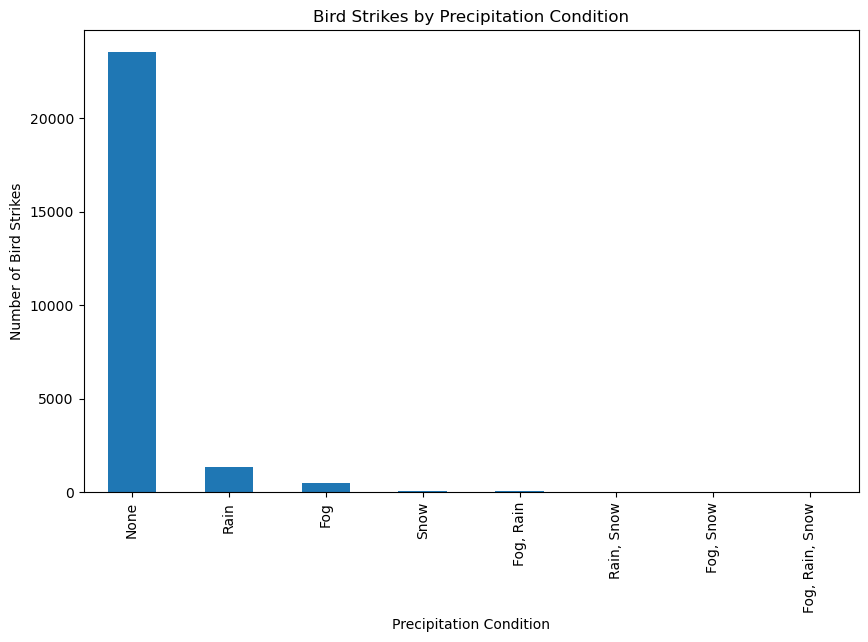

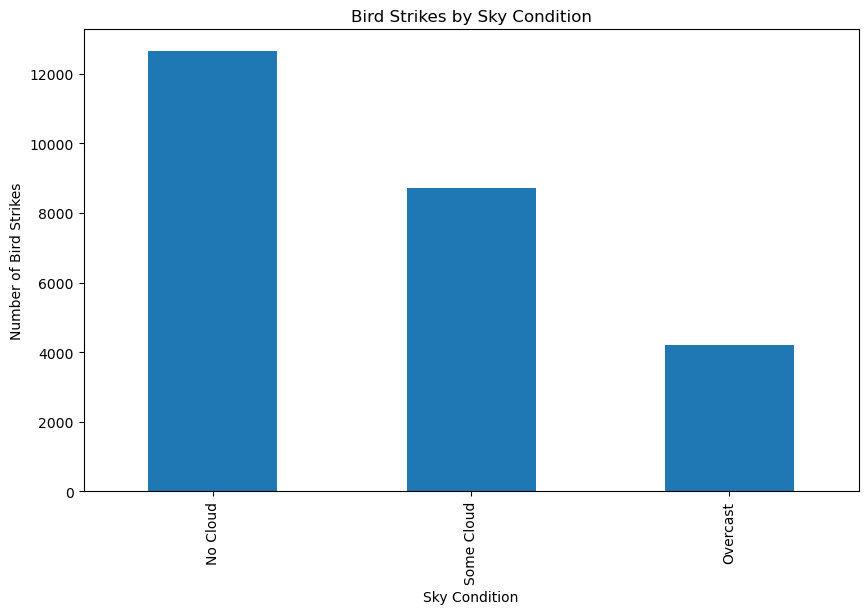

In [47]:
# Plot bird strikes by precipitation condition
plt.figure(figsize=(10, 6))
bird_strikes_df['Conditions: Precipitation'].value_counts().plot(kind='bar')
plt.title('Bird Strikes by Precipitation Condition')
plt.xlabel('Precipitation Condition')
plt.ylabel('Number of Bird Strikes')
plt.show()

# Plot bird strikes by sky condition
plt.figure(figsize=(10, 6))
bird_strikes_df['Conditions: Sky'].value_counts().plot(kind='bar')
plt.title('Bird Strikes by Sky Condition')
plt.xlabel('Sky Condition')
plt.ylabel('Number of Bird Strikes')
plt.show()

### Interpretation:

#### Bird Strikes by Precipitation Condition:
- **None**: The majority of bird strikes occur under no precipitation conditions, with over 20,000 incidents.
- **Rain**: The second most common condition, with a significant but much lower number of incidents.
- **Fog, Snow, and Combined Conditions**: Relatively few bird strikes occur under these conditions.

#### Bird Strikes by Sky Condition:
- **No Cloud**: Most bird strikes occur under clear sky conditions, with over 12,000 incidents.
- **Some Cloud**: The second most common condition, with around 8,000 incidents.
- **Overcast**: Fewer bird strikes occur under overcast conditions, with approximately 4,000 incidents.

### Business Problem and Solution:

#### Problem:
Bird strikes are more frequent under specific environmental conditions, particularly clear skies and no precipitation. Understanding these patterns can help in developing targeted strategies to reduce bird strike incidents under these conditions.

#### Solution:

1. **Enhanced Monitoring and Detection**:
   - **Weather-Integrated Bird Detection**: Integrate bird detection systems with real-time weather data to identify high-risk conditions for bird strikes.
   - **Advanced Surveillance**: Use advanced radar and surveillance systems to monitor bird activity more closely during high-risk weather conditions.

2. **Operational Adjustments**:
   - **Adjust Flight Schedules**: Modify flight schedules to avoid times when bird activity is high and conditions are clear or have no precipitation.
   - **Flight Path Changes**: Adjust flight paths during take-off and landing to avoid known bird habitats, especially under clear skies and no precipitation.

3. **Pilot and Staff Training**:
   - **Weather-Specific Training**: Train pilots and ground staff to be extra vigilant and take preventive measures during clear weather and no precipitation conditions.
   - **Emergency Response Drills**: Conduct regular drills simulating bird strike scenarios under different weather conditions to prepare pilots for real-life incidents.

4. **Environmental Management**:
   - **Habitat Modification**: Modify habitats around airports to make them less attractive to birds, focusing on areas that are problematic under clear skies and no precipitation.
   - **Bird Deterrent Systems**: Use acoustic and visual deterrent systems to keep birds away from flight paths, especially during high-risk weather conditions.

5. **Predictive Analytics**:
   - **Risk Forecasting**: Use predictive analytics to forecast high-risk periods based on historical data of bird strikes and weather conditions.
   - **Proactive Measures**: Implement proactive measures during predicted high-risk periods, such as increased bird deterrence and altered flight operations.

6. **Community Engagement and Awareness**:
   - **Public Education Campaigns**: Educate the public and local communities about the risks of bird strikes and the importance of not feeding birds near airports.
   - **Community Programs**: Develop community programs to manage bird populations and habitats, focusing on reducing bird activity during high-risk conditions.

### Summary:
By focusing on the environmental conditions associated with higher bird strike incidents, airlines and airports can implement targeted measures to reduce these incidents. Enhanced monitoring, operational adjustments, pilot and staff training, environmental management, predictive analytics, and community engagement are key strategies to address this business problem effectively. Implementing these solutions can lead to improved flight safety and reduced operational disruptions.

## Are there specific bird species that pose a higher risk, and are these species more active during certain periods?

## Species Analysis
High-Risk Bird Species: Identify the bird species most frequently involved in strikes and analyze their activity patterns.

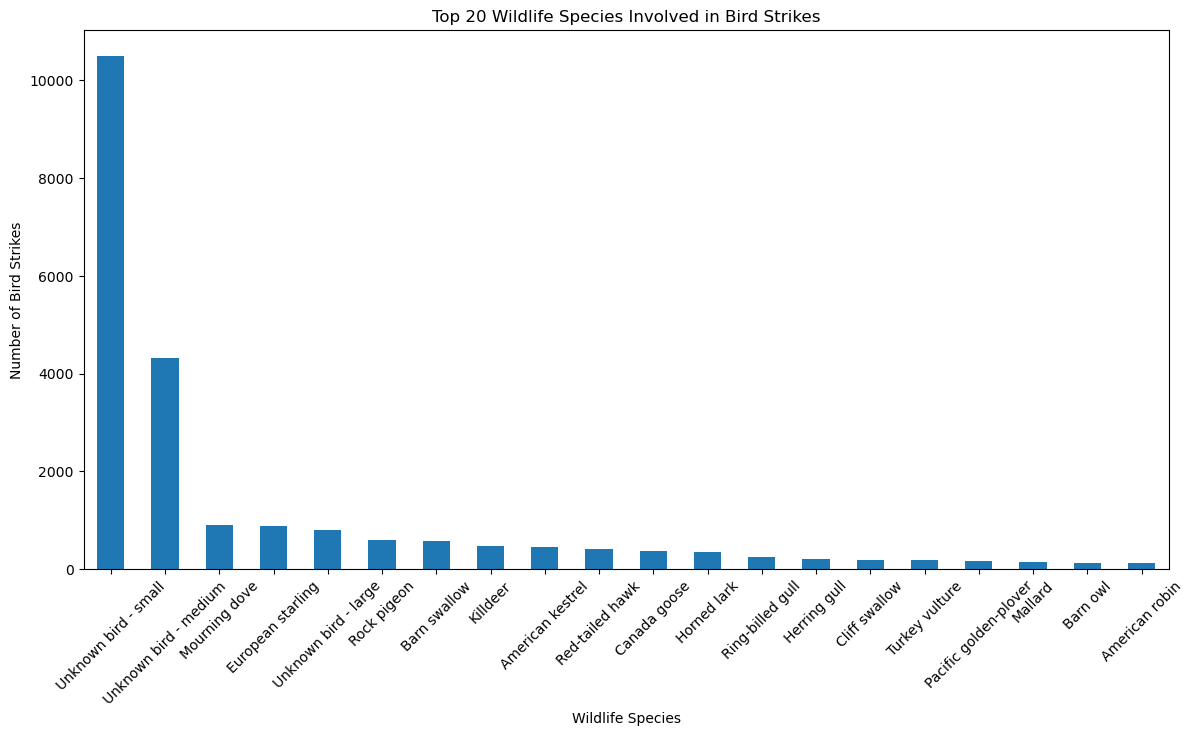

In [48]:
# Plot bird strikes by wildlife species
plt.figure(figsize=(14, 7))
bird_strikes_df['Wildlife: Species'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Wildlife Species Involved in Bird Strikes')
plt.xlabel('Wildlife Species')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45)
plt.show()

### Interpretation:

#### Bird Species with Higher Risk:
- **Unknown Bird - Small**: The most frequently involved species in bird strikes, with over 10,000 incidents.
- **Unknown Bird - Medium**: The second most common, with around 4,000 incidents.
- **Other Species**: Mourning dove, European starling, rock pigeon, and various other species are also involved, but to a lesser extent.

#### Activity Periods:
- The dataset does not directly show the activity periods for these species, but historical data and wildlife studies can help identify peak activity periods for these species, such as migration seasons and nesting periods.

### Business Problem and Solution:

#### Problem:
Certain bird species are more frequently involved in bird strikes, posing a higher risk to aviation safety. Understanding the activity patterns of these species can help in developing targeted measures to reduce bird strike incidents.

#### Solution:

1. **Species-Specific Monitoring and Management**:
   - **Identify Peak Activity Periods**: Use historical data and wildlife studies to identify the peak activity periods of high-risk bird species, such as migration seasons and nesting periods.
   - **Real-Time Monitoring**: Implement advanced bird detection and monitoring systems to track the activity of these species in real-time, especially during their peak periods.

2. **Habitat Management**:
   - **Modify Surrounding Habitats**: Alter the habitats around airports to make them less attractive to high-risk bird species. This includes managing food sources, water bodies, and nesting areas.
   - **Vegetation Management**: Regularly manage and trim vegetation to deter birds from nesting and roosting near runways and flight paths.

3. **Use of Bird Deterrent Technologies**:
   - **Acoustic Deterrents**: Use sound devices to deter birds, especially during peak activity periods of high-risk species.
   - **Visual Deterrents**: Implement visual deterrents, such as lasers and reflective materials, to scare birds away from critical areas.

4. **Adjust Flight Operations**:
   - **Schedule Adjustments**: Modify flight schedules to avoid peak activity times of high-risk bird species.
   - **Flight Path Modifications**: Adjust flight paths to minimize the risk of bird strikes during take-off and landing, especially during high-risk periods.

5. **Community and Public Engagement**:
   - **Educational Campaigns**: Educate the public and local communities about the risks of bird strikes and the importance of not feeding birds near airports.
   - **Collaboration with Wildlife Experts**: Work with ornithologists and wildlife experts to develop and implement effective bird strike prevention measures.

6. **Predictive Analytics and Proactive Measures**:
   - **Forecasting High-Risk Periods**: Use predictive analytics to forecast high-risk periods for bird strikes based on historical data and wildlife activity patterns.
   - **Proactive Bird Management**: Implement proactive measures, such as increased monitoring and deterrence, during predicted high-risk periods.

7. **Enhanced Pilot Training and Awareness**:
   - **Wildlife Risk Training**: Train pilots and ground staff on identifying and responding to wildlife risks, particularly for high-risk species.
   - **Emergency Procedures**: Regularly conduct drills and simulations to prepare pilots for bird strike scenarios involving high-risk species.

### Summary:
By focusing on the bird species that pose a higher risk and understanding their activity patterns, airports and airlines can implement targeted measures to reduce bird strike incidents. Effective habitat management, use of bird deterrent technologies, flight operation adjustments, community engagement, predictive analytics, and enhanced pilot training are key strategies to address this business problem and enhance aviation safety.

## Conclusion:
By addressing these business problems through EDA, airlines and airports can develop targeted strategies to reduce bird strike incidents. Implementing preventive measures during high-risk periods and locations, as well as understanding environmental conditions and species behavior, can significantly enhance flight safety and operational efficiency.

Based on your updated dataset, let's create a set of aggregations that can be useful for a Tableau dashboard without relying on the FlightDate column.

Aggregation Ideas

Number of Bird Strikes by Airport

Number of Bird Strikes by Phase of Flight

Number of Bird Strikes by Altitude Bin

Number of Bird Strikes by Aircraft Model

Number of Bird Strikes by State

Number of Bird Strikes by Precipitation Condition

Number of Bird Strikes by Sky Condition

Number of Bird Strikes by Wildlife Species


### Instructions and Code for Aggregation

In [51]:
#Number of Bird Strikes by Airport
# Load the data
df = pd.read_csv('Bird_Strikes_Cleaned.csv')

# Aggregate by Airport
airport_agg = df.groupby('Airport: Name').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
airport_agg.to_csv('Airport_Aggregated.csv', index=False)
print('Airport_Aggregated.csv file saved.')


Airport_Aggregated.csv file saved.


In [52]:
#Number of Bird Strikes by Phase of Flight
# Aggregate by Phase of Flight
phase_agg = df.groupby('When: Phase of flight').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
phase_agg.to_csv('Phase_Aggregated.csv', index=False)
print('Phase_Aggregated.csv file saved.')

Phase_Aggregated.csv file saved.


In [53]:
#Number of Bird Strikes by Altitude Bin

# Aggregate by Altitude Bin
altitude_agg = df.groupby('Altitude bin').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
altitude_agg.to_csv('Altitude_Aggregated.csv', index=False)
print('Altitude_Aggregated.csv file saved.')

Altitude_Aggregated.csv file saved.


In [54]:
#Number of Bird Strikes by Aircraft Model

# Aggregate by Aircraft Model
aircraft_model_agg = df.groupby('Aircraft: Make/Model').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
aircraft_model_agg.to_csv('Aircraft_Model_Aggregated.csv', index=False)
print('Aircraft_Model_Aggregated.csv file saved.')

Aircraft_Model_Aggregated.csv file saved.


In [55]:
#Number of Bird Strikes by State

# Aggregate by State
state_agg = df.groupby('Origin State').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
state_agg.to_csv('State_Aggregated.csv', index=False)
print('State_Aggregated.csv file saved.')

State_Aggregated.csv file saved.


In [56]:
#Number of Bird Strikes by Precipitation Condition

# Aggregate by Precipitation Condition
precipitation_agg = df.groupby('Conditions: Precipitation').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
precipitation_agg.to_csv('Precipitation_Aggregated.csv', index=False)
print('Precipitation_Aggregated.csv file saved.')

Precipitation_Aggregated.csv file saved.


In [57]:
#Number of Bird Strikes by Sky Condition

# Aggregate by Sky Condition
sky_agg = df.groupby('Conditions: Sky').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
sky_agg.to_csv('Sky_Aggregated.csv', index=False)
print('Sky_Aggregated.csv file saved.')

Sky_Aggregated.csv file saved.


In [58]:
#Number of Bird Strikes by Wildlife Species

# Aggregate by Wildlife Species
species_agg = df.groupby('Wildlife: Species').size().reset_index(name='Number of Bird Strikes')

# Save to CSV
species_agg.to_csv('Species_Aggregated.csv', index=False)
print('Species_Aggregated.csv file saved.')

Species_Aggregated.csv file saved.
